# Artificial Intelligence Group CA

<h2>Members</h2>

* Israa Atike (D00262160)
* Yu Kang Ong (D00262134)
* Kaylee Jacqueline Wijaya (D00262128)

In this project, we will be looking at a dataset called [`CUSTOMER_INSURANCE_LTV`](https://github.com/AnalyticsandDataOracleUserCommunity/MachineLearning/tree/master/cust_insur_ltv), which includes a list of customers' information related to insurance. The main goal of this project is to implement machine learning to predict whether a customer will buy insurance or not based on their demographic, financial, and behavioral information provided in the dataset.

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [3]:
df = pd.read_csv("CUSTOMER_INSURANCE_LTV.csv")
df

,MARITAL_STATUS,STATE,CREDIT_BALANCE,CUSTOMER_TENURE,MORTGAGE_AMOUNT,BANK_FUNDS,NUM_DEPENDENTS,HAS_CHILDREN,INCOME,CUSTOMER_ID,...,LTV,TOTAL_AUTOM_PAYMENTS,NUM_TRANS_TELLER,CHECKING_BALANCE,NUM_TRANS_ATM,LTV_BIN,FIRST_NAME,NUM_MORTGAGES,CAR_OWNERSHIP,LAST_NAME
0,SINGLE,CA,0,3,0,0,3,0,65871,CU15154,...,14367.75,0,0,25,0,MEDIUM,GAYLE,0,0,DURANT
1,SINGLE,NY,0,4,0,290,4,0,68747,CU15155,...,14686.75,287,2,25,4,MEDIUM,QUINTON,0,1,MASSEY
2,MARRIED,MI,0,3,1000,550,3,0,68684,CU15157,...,25271.00,132,2,25,4,HIGH,ANIBAL,1,1,JIMENEZ
3,MARRIED,UT,0,5,1200,1000,5,0,59354,CU15286,...,19738.50,628,3,619,1,MEDIUM,JUNITA,1,1,ROBERTSON
4,MARRIED,UT,0,4,1800,0,3,0,84801,CU15287,...,31900.25,0,0,25,0,VERY HIGH,CHASITY,1,1,ELLIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13875,DIVORCED,NY,0,1,3626,15000,1,1,63341,CU6516,...,25535.25,3158,5,25,5,HIGH,LUCIENNE,1,1,VINCENT
13876,SINGLE,NY,19086,2,0,900,0,1,69696,CU4766,...,18624.00,32723,3,12997,4,MEDIUM,FOREST,0,1,PYLE
13877,MARRIED,NY,0,4,5000,5325,3,1,63321,CU4774,...,21430.25,1853,1,25,6,MEDIUM,DICK,1,1,DUKE
13878,MARRIED,CA,11797,2,8500,8045,0,0,66090,CU4783,...,31322.50,32951,9,19222,5,VERY HIGH,JAKE,1,1,HOUCK


In [4]:
# Checking dimensions
df.shape

(13880, 31)

In [5]:
# Checking data types
df.dtypes

MARITAL_STATUS             object
STATE                      object
CREDIT_BALANCE              int64
CUSTOMER_TENURE             int64
MORTGAGE_AMOUNT             int64
BANK_FUNDS                  int64
NUM_DEPENDENTS              int64
HAS_CHILDREN                int64
INCOME                      int64
CUSTOMER_ID                object
GENDER                     object
PROFESSION                 object
CREDIT_CARD_LIMITS          int64
REGION                     object
HOME_OWNERSHIP              int64
NUM_ONLINE_TRANS            int64
BUY_INSURANCE              object
MONTHLY_CHECKS              int64
NUM_TRANS_KIOSK             int64
AGE                         int64
MONEY_MONTLY_OVERDRAWN    float64
LTV                       float64
TOTAL_AUTOM_PAYMENTS        int64
NUM_TRANS_TELLER            int64
CHECKING_BALANCE            int64
NUM_TRANS_ATM               int64
LTV_BIN                    object
FIRST_NAME                 object
NUM_MORTGAGES               int64
CAR_OWNERSHIP 

## Data Cleaning

### Removing Columns

Since we are trying to predict whether a customer will buy an insurance or not, the dependent variable should be `BUY_INSURANCE`.
Since `CUSTOMER_ID`, `FIRST_NAME` and `LAST_NAME` are not important variables in classifying `BUY_INSURANCE` , we should remove it.

In [6]:
df.drop(columns=["CUSTOMER_ID", "FIRST_NAME", "LAST_NAME"], inplace=True)

In [7]:
df.columns

Index(['MARITAL_STATUS', 'STATE', 'CREDIT_BALANCE', 'CUSTOMER_TENURE',
       'MORTGAGE_AMOUNT', 'BANK_FUNDS', 'NUM_DEPENDENTS', 'HAS_CHILDREN',
       'INCOME', 'GENDER', 'PROFESSION', 'CREDIT_CARD_LIMITS', 'REGION',
       'HOME_OWNERSHIP', 'NUM_ONLINE_TRANS', 'BUY_INSURANCE', 'MONTHLY_CHECKS',
       'NUM_TRANS_KIOSK', 'AGE', 'MONEY_MONTLY_OVERDRAWN', 'LTV',
       'TOTAL_AUTOM_PAYMENTS', 'NUM_TRANS_TELLER', 'CHECKING_BALANCE',
       'NUM_TRANS_ATM', 'LTV_BIN', 'NUM_MORTGAGES', 'CAR_OWNERSHIP'],
      dtype='object')

### Missing Values Analysis

In [8]:
df.isnull().sum().sort_values(ascending=False)

MARITAL_STATUS            0
STATE                     0
NUM_MORTGAGES             0
LTV_BIN                   0
NUM_TRANS_ATM             0
CHECKING_BALANCE          0
NUM_TRANS_TELLER          0
TOTAL_AUTOM_PAYMENTS      0
LTV                       0
MONEY_MONTLY_OVERDRAWN    0
AGE                       0
NUM_TRANS_KIOSK           0
MONTHLY_CHECKS            0
BUY_INSURANCE             0
NUM_ONLINE_TRANS          0
HOME_OWNERSHIP            0
REGION                    0
CREDIT_CARD_LIMITS        0
PROFESSION                0
GENDER                    0
INCOME                    0
HAS_CHILDREN              0
NUM_DEPENDENTS            0
BANK_FUNDS                0
MORTGAGE_AMOUNT           0
CUSTOMER_TENURE           0
CREDIT_BALANCE            0
CAR_OWNERSHIP             0
dtype: int64

There are no missing values in the dataset.

### Renaming Categorical Variables Value

Next, we will  and try to rename some of the values of `PROFESSION` to make it easier for data analysis and machine learning part later on.

We shall categorise the `PROFESSION` based on its respective field.

In [9]:
df["PROFESSION"].unique()

array(['Nurse', 'Programmer/Developer', 'Fireman', 'PROF-26', 'Professor',
       'Sales Representative', 'Construction Laborer', 'PROF-3',
       'PROF-52', 'PROF-59', 'PROF-6', 'PROF-30', 'Plumber',
       'School Teacher', 'PROF-21', 'Clerical', 'Not specified',
       'Administrative Assistant', 'Cashier', 'Truck Driver',
       'Administrator', 'IT Staff', 'Waiter/Waitress',
       'Software Engineer', 'PROF-28', 'PROF-27', 'PROF-12',
       'Bank Teller', 'PROF-19', 'PROF-1', 'PROF-5', 'PROF-29',
       'Childcare Worker', 'Technical Writer', 'PROF-10', 'PROF-34',
       'Homemaker', 'PROF-18', 'Medical Doctor', 'Dentist', 'PROF-38',
       'DBA', 'PROF-40', 'PROF-23', 'Veterinarian', 'PROF-11', 'PROF-62',
       'Author', 'PROF-9', 'Mason', 'PROF-16', 'PROF-42',
       'Law Enforcement Officer', 'PROF-15', 'Accountant', 'PROF-20',
       'PROF-43', 'PROF-14', 'PROF-33', 'PROF-22', 'First-line Manager',
       'Publisher', 'Lab Technician', 'PROF-13', 'PROF-4', 'PROF-31',
       

In [10]:
#map profession based on field using regex
profession_map = {
        r"Nurse|Medical Doctor|Dentist|Veterinarian|Lab Technician": "Healthcare",
        r"Programmer/Developer|IT Staff|Software Engineer|Technical Writer|DBA": "IT",
        r"Fireman|Law Enforcement Officer": "Public Safety",
        r"Professor|School Teacher": "Education",
        r"Sales Representative|Cashier|Waiter/Waitress|Bank Teller": "Customer Service",
        r"Construction Laborer|Plumber|Mason": "Construction and Trades",
        r"Clerical|Administrative Assistant|Administrator|First-line Manager|Secretary": "Administrative and Clerical",
        r"Truck Driver": "Transportation", 
        r"Childcare Worker|Homemaker": "Childcare and Home",
        r"Author|Publisher": "Creative Media",
        r"Accountant": "Finance",
        r"Not specified|PROF-[\d+]": "Undefined"
}

for original, new in profession_map.items():
        df.loc[df["PROFESSION"].str.match(original), "PROFESSION"] = new

In [11]:
df["PROFESSION"].unique()

array(['Healthcare', 'IT', 'Public Safety', 'Undefined', 'Education',
       'Customer Service', 'Construction and Trades',
       'Administrative and Clerical', 'Transportation',
       'Childcare and Home', 'Creative Media', 'Finance'], dtype=object)

In [12]:
df["STATE"].unique()

array(['CA', 'NY', 'MI', 'UT', 'OR', 'FL', 'IL', 'MS', 'TX', 'WA', 'CO',
       'NV', 'DC', 'NC', 'OK', 'MN', 'AL', 'LA', 'NM', 'OH', 'WI', 'MO',
       'AK', 'AZ'], dtype=object)

In [13]:
#map the state name
state_map = {
    "CA": "California",
    "NY": "New York",
    "MI": "Michigan",
    "UT": "Utah",
    "OR": "Oregon",
    "FL": "Florida",
    "IL": "Illinois",
    "MS": "Mississippi",
    "TX": "Texas",
    "WA": "Washington",
    "CO": "Colorado",
    "NV": "Nevada",
    "DC": "District of Columbia",
    "NC": "North Carolina",
    "OK": "Oklahoma",
    "MN": "Minnesota",
    "AL": "Alabama",
    "LA": "Louisiana",
    "NM": "New Mexico",
    "OH": "Ohio",
    "WI": "Wisconsin",
    "MO": "Missouri",
    "AK": "Alaska",
    "AZ": "Arizona"
}


for original, new in state_map.items():
    df.loc[df["STATE"] == original, "STATE"] = new

### Imputing Undefinded with CategoricalImputer

Next, we are going to replace "Undefined" value in `PROFESSION` with the most frequent value.

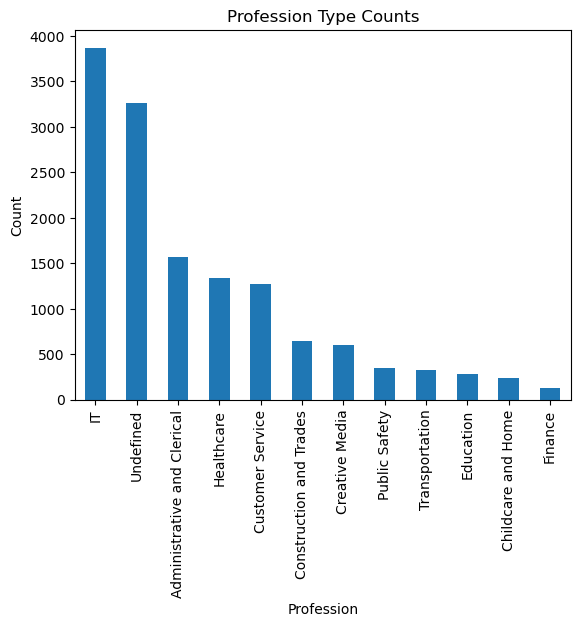

In [14]:
df['PROFESSION'].value_counts().plot(kind='bar')

plt.xlabel('Profession')
plt.ylabel('Count')
plt.title('Profession Type Counts')
plt.show()

In [15]:
# replace `Undefined` with the most frequent value, which is 'IT'
# make sure to install the correct version of sklearn_pandas
# pip install sklearn-pandas==1.5.0
from sklearn_pandas import CategoricalImputer
imp_mean = CategoricalImputer("Undefined")
df['PROFESSION'] = imp_mean.fit_transform(df['PROFESSION'])


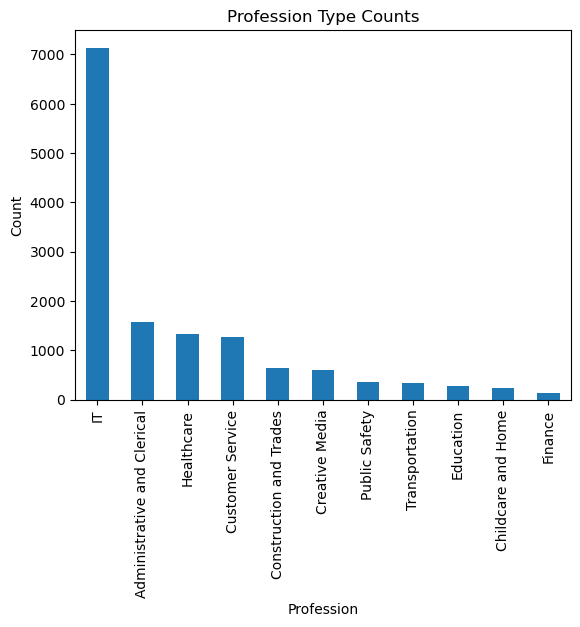

In [16]:
df['PROFESSION'].value_counts().plot(kind='bar')

plt.xlabel('Profession')
plt.ylabel('Count')
plt.title('Profession Type Counts')
plt.show()

## Exploratory Data Analysis

We are interested in the `BUY_INSURANCE` column because that is our target/dependent variable.

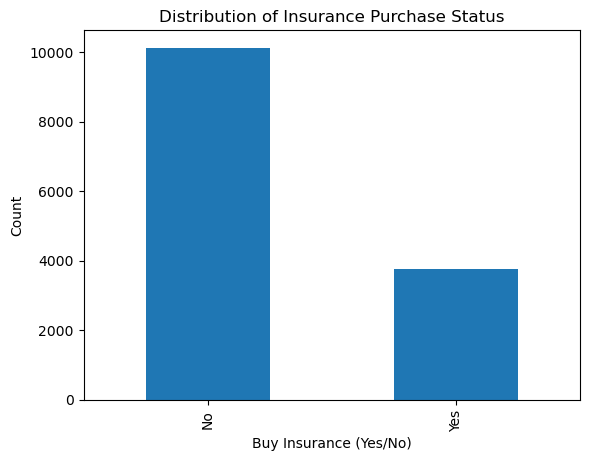

In [17]:
df['BUY_INSURANCE'].value_counts().sort_index().plot(kind='bar')

plt.xlabel('Buy Insurance (Yes/No)')
plt.ylabel('Count')
plt.title('Distribution of Insurance Purchase Status')
plt.show()

Creating a data frame with the data where `BUY_INSURANCE` is 'Yes'

In [18]:
buy = df['BUY_INSURANCE'] == 'Yes'
df_buy = df[buy]

In [19]:
df_buy

,MARITAL_STATUS,STATE,CREDIT_BALANCE,CUSTOMER_TENURE,MORTGAGE_AMOUNT,BANK_FUNDS,NUM_DEPENDENTS,HAS_CHILDREN,INCOME,GENDER,...,AGE,MONEY_MONTLY_OVERDRAWN,LTV,TOTAL_AUTOM_PAYMENTS,NUM_TRANS_TELLER,CHECKING_BALANCE,NUM_TRANS_ATM,LTV_BIN,NUM_MORTGAGES,CAR_OWNERSHIP
1,SINGLE,New York,0,4,0,290,4,0,68747,M,...,35,53.84,14686.75,287,2,25,4,MEDIUM,0,1
2,MARRIED,Michigan,0,3,1000,550,3,0,68684,M,...,26,53.48,25271.00,132,2,25,4,HIGH,1,1
12,DIVORCED,California,0,1,3000,16950,1,1,64557,F,...,48,54.56,24439.25,2143,5,25,5,HIGH,1,1
20,SINGLE,Michigan,25209,2,0,6725,0,1,66144,M,...,40,54.18,16536.00,48524,1,20614,5,MEDIUM,0,1
22,MARRIED,Illinois,0,3,1061,850,3,1,62754,M,...,58,55.12,21988.50,582,3,25,5,MEDIUM,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13861,DIVORCED,Michigan,0,2,4500,15000,0,1,60342,M,...,41,58.85,25185.50,6725,1,25,6,HIGH,1,1
13868,MARRIED,California,0,4,5000,7301,1,1,66338,F,...,38,57.06,35384.50,8078,4,1093,6,VERY HIGH,2,1
13874,MARRIED,New York,0,5,1000,800,5,1,62803,F,...,21,53.62,15300.75,869,3,85,4,MEDIUM,1,1
13875,DIVORCED,New York,0,1,3626,15000,1,1,63341,F,...,62,54.78,25535.25,3158,5,25,5,HIGH,1,1


### EDA of Social Factors

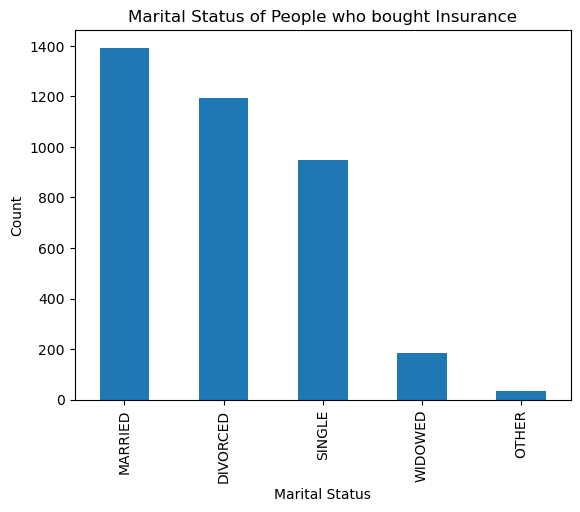

In [20]:
df_buy['MARITAL_STATUS'].value_counts().plot(kind='bar')
plt.title('Marital Status of People who bought Insurance')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

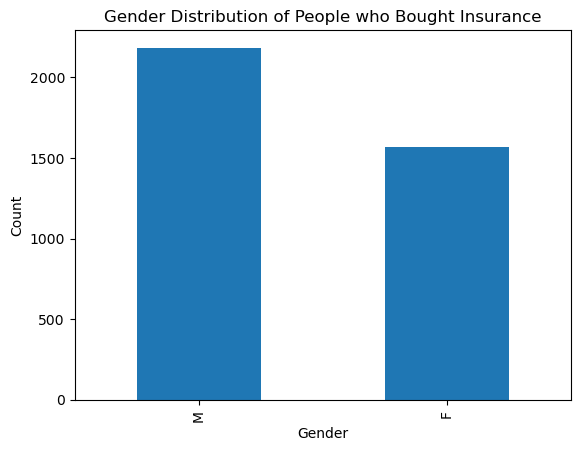

In [21]:
df_buy['GENDER'].value_counts().plot(kind='bar')
plt.title('Gender Distribution of People who Bought Insurance')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

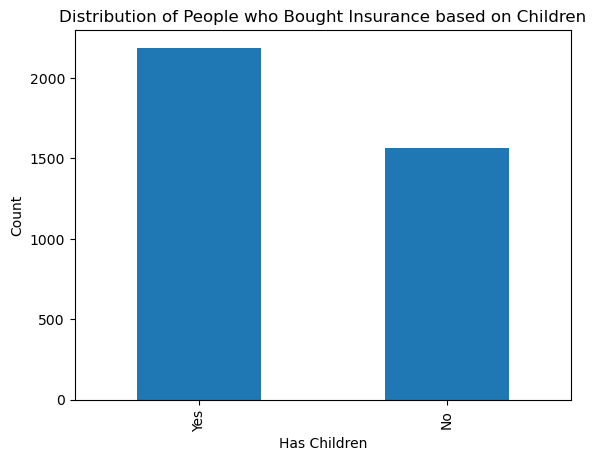

In [22]:
ax = df_buy['HAS_CHILDREN'].value_counts().plot(kind='bar')
plt.title('Distribution of People who Bought Insurance based on Children')
plt.xlabel('Has Children')
plt.ylabel('Count')

ax.set_xticklabels(['Yes', 'No'])
plt.show()

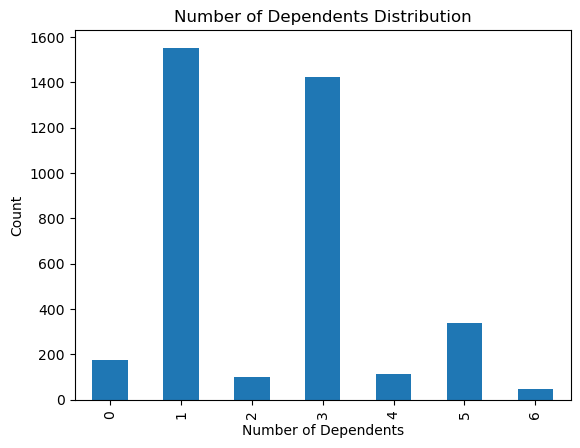

In [23]:
df_buy['NUM_DEPENDENTS'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Dependents Distribution')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.show()

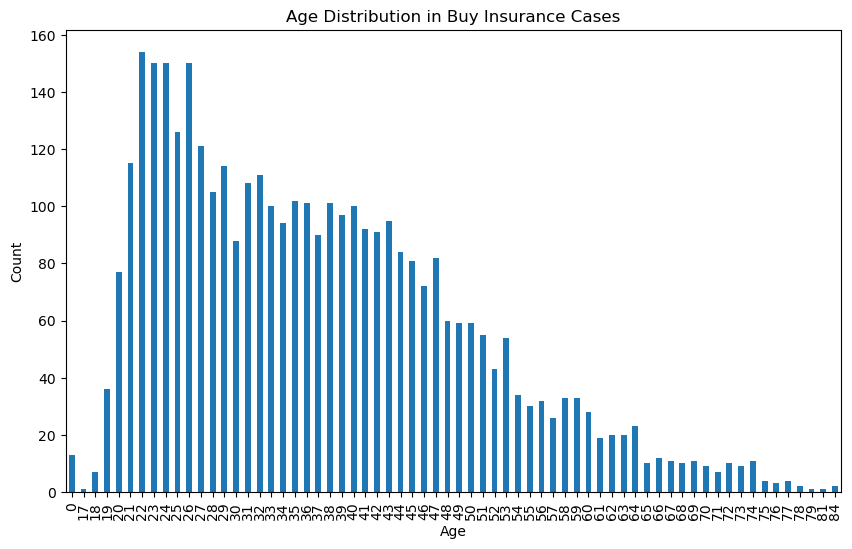

In [24]:
plt.figure(figsize=(10, 6))
df_buy['AGE'].value_counts().sort_index().plot(kind='bar')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution in Buy Insurance Cases')
plt.show()

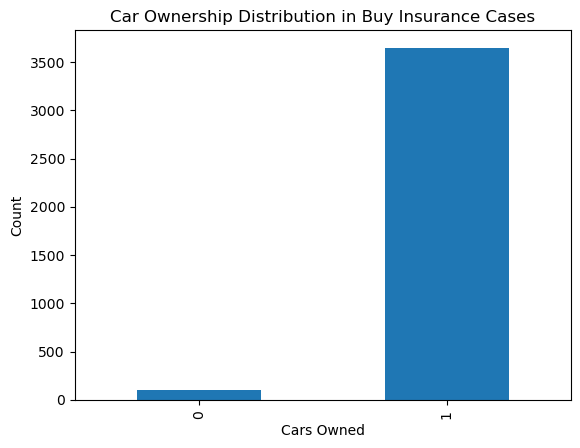

In [25]:
df_buy['CAR_OWNERSHIP'].value_counts().sort_index().plot(kind='bar')

plt.xlabel('Cars Owned')
plt.ylabel('Count')
plt.title('Car Ownership Distribution in Buy Insurance Cases')
plt.show()

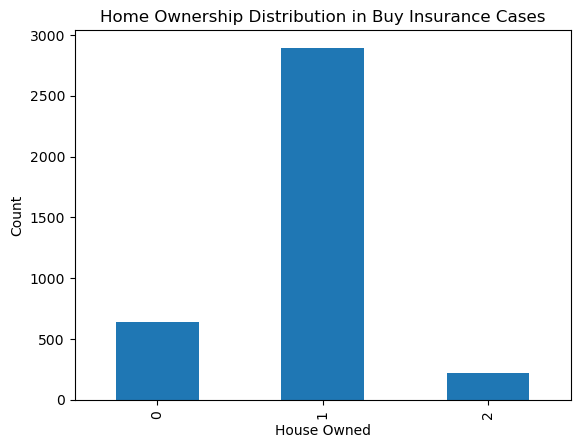

In [26]:
df_buy['HOME_OWNERSHIP'].value_counts().sort_index().plot(kind='bar')

plt.xlabel('House Owned')
plt.ylabel('Count')
plt.title('Home Ownership Distribution in Buy Insurance Cases')
plt.show()

### EDA of Demographic factors

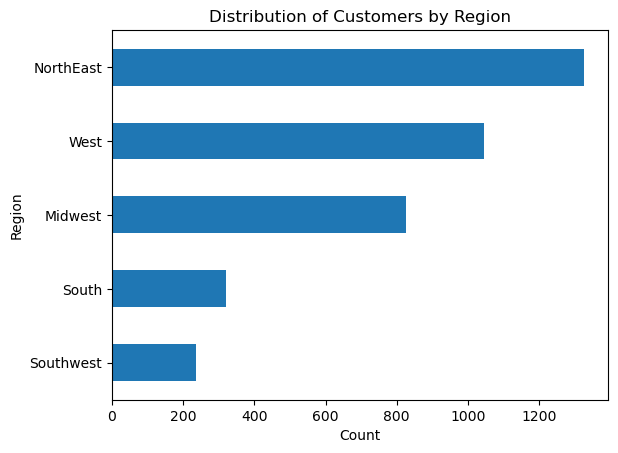

In [27]:
df_buy['REGION'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Distribution of Customers by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

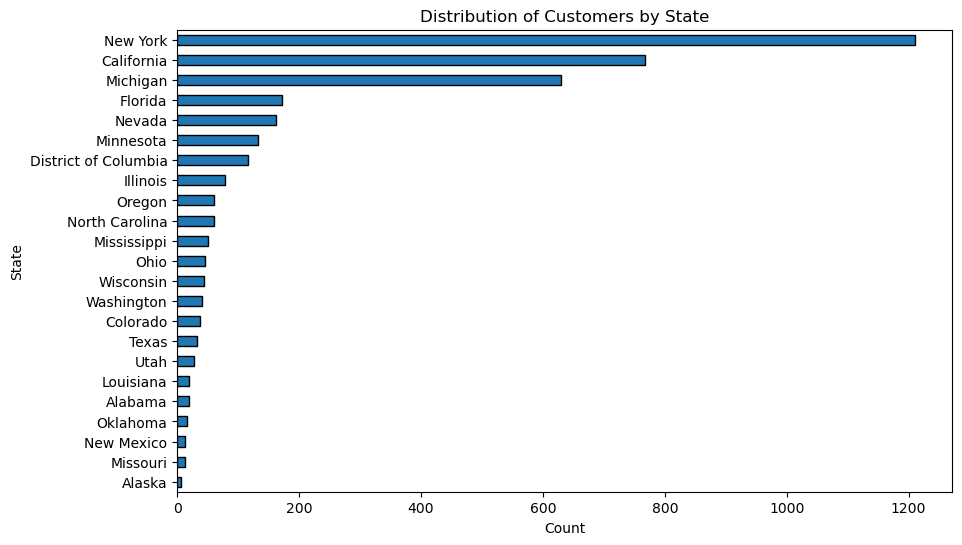

In [28]:
df_buy['STATE'].value_counts().sort_values().plot(kind='barh',  edgecolor='black',figsize=(10, 6))
plt.title('Distribution of Customers by State')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()


### EDA of Behavioral Factors

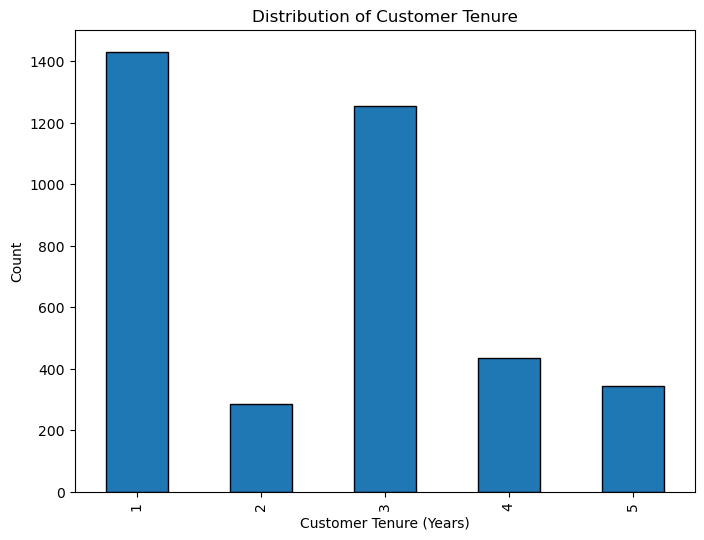

In [29]:
df_buy['CUSTOMER_TENURE'].value_counts().sort_index().plot(kind='bar', edgecolor='black', figsize=(8, 6))
plt.title('Distribution of Customer Tenure')
plt.xlabel('Customer Tenure (Years)')
plt.ylabel('Count')
plt.show()

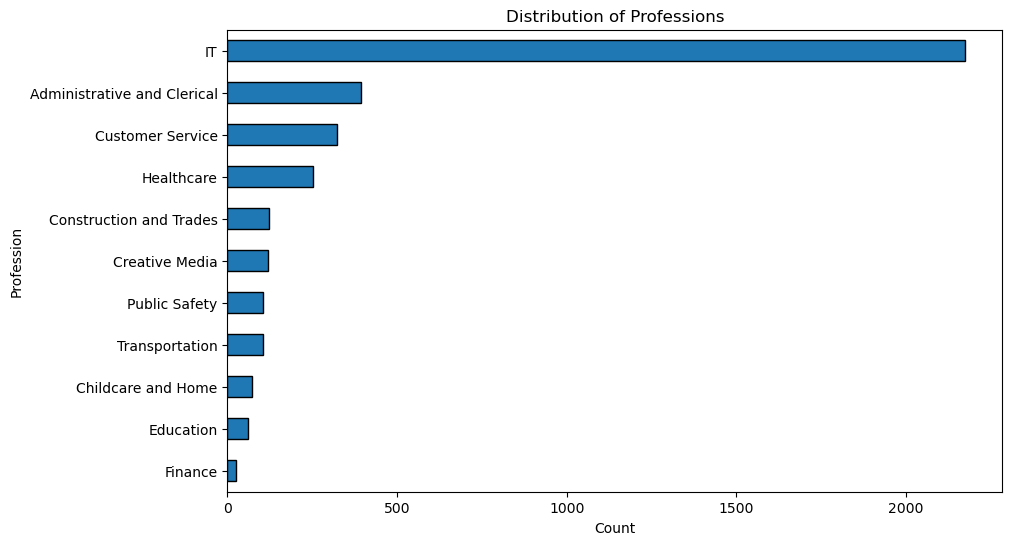

In [30]:
df_buy['PROFESSION'].value_counts(ascending=True).plot(kind='barh', edgecolor='black', figsize=(10, 6))
plt.title('Distribution of Professions')
plt.xlabel('Count')
plt.ylabel('Profession')
plt.show()

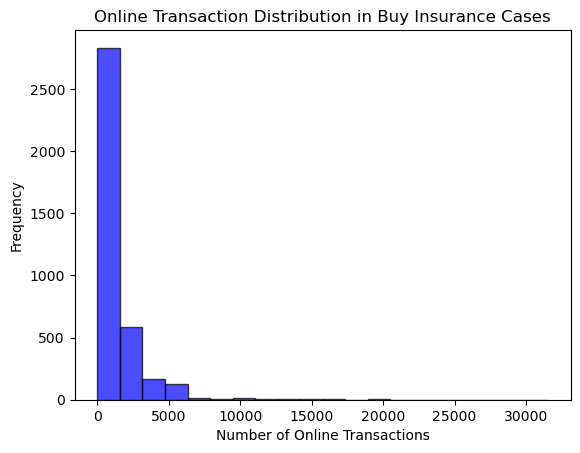

In [31]:
plt.hist(df_buy['NUM_ONLINE_TRANS'], bins=20, color='blue', alpha=0.7, edgecolor='black')

plt.xlabel('Number of Online Transactions')
plt.ylabel('Frequency')
plt.title('Online Transaction Distribution in Buy Insurance Cases')
plt.show()


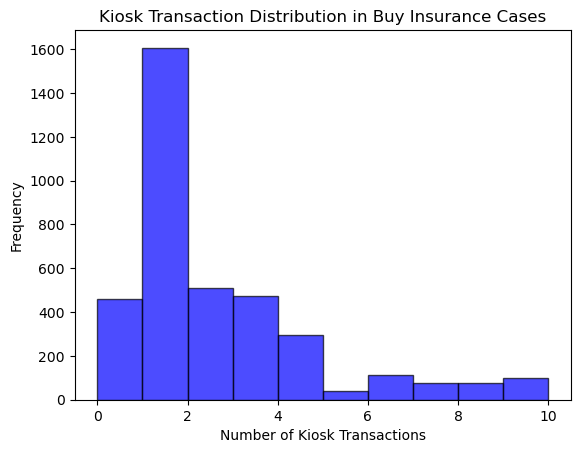

In [32]:
plt.hist(df_buy['NUM_TRANS_KIOSK'], bins=10, color='blue', alpha=0.7, edgecolor='black')

plt.xlabel('Number of Kiosk Transactions')
plt.ylabel('Frequency')
plt.title('Kiosk Transaction Distribution in Buy Insurance Cases')
plt.show()

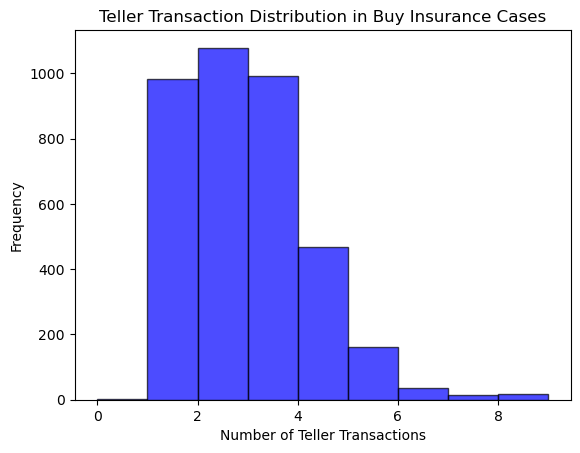

In [33]:
plt.hist(df_buy['NUM_TRANS_TELLER'],bins=9, color='blue', alpha=0.7, edgecolor='black')

plt.xlabel('Number of Teller Transactions')
plt.ylabel('Frequency')
plt.title('Teller Transaction Distribution in Buy Insurance Cases')
plt.show()

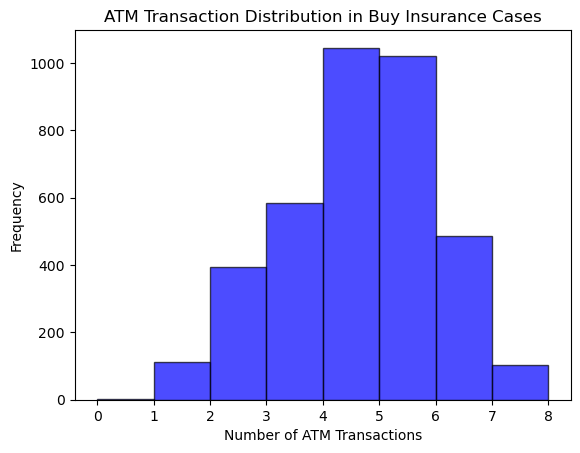

In [34]:
plt.hist(df_buy['NUM_TRANS_ATM'], bins=8,color='blue', alpha=0.7, edgecolor='black')

plt.xlabel('Number of ATM Transactions')
plt.ylabel('Frequency')
plt.title('ATM Transaction Distribution in Buy Insurance Cases')
plt.show()

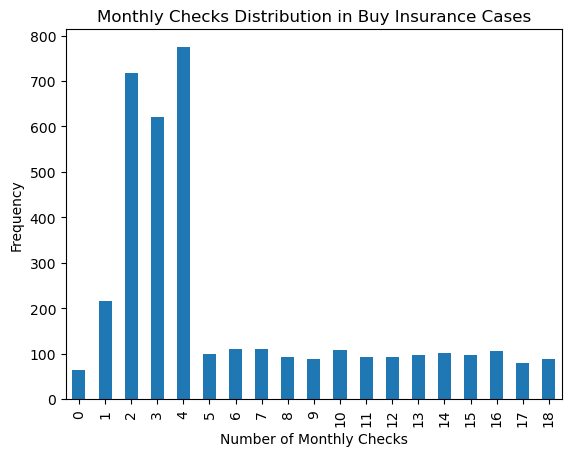

In [35]:
df_buy['MONTHLY_CHECKS'].value_counts().sort_index().plot(kind='bar')

plt.xlabel('Number of Monthly Checks')
plt.ylabel('Frequency')
plt.title('Monthly Checks Distribution in Buy Insurance Cases')
plt.show()

### EDA of Financial Factors

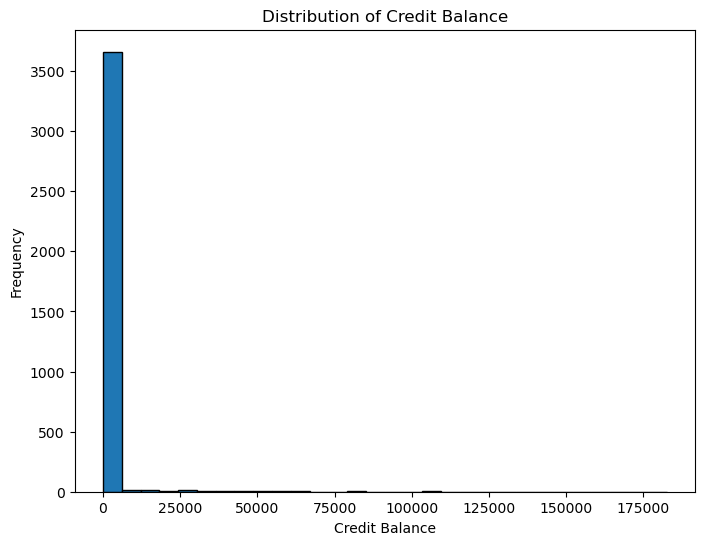

In [36]:
df_buy['CREDIT_BALANCE'].plot(kind='hist', bins=30, edgecolor='black', figsize=(8, 6))
plt.title('Distribution of Credit Balance')
plt.xlabel('Credit Balance')
plt.ylabel('Frequency')
plt.show()

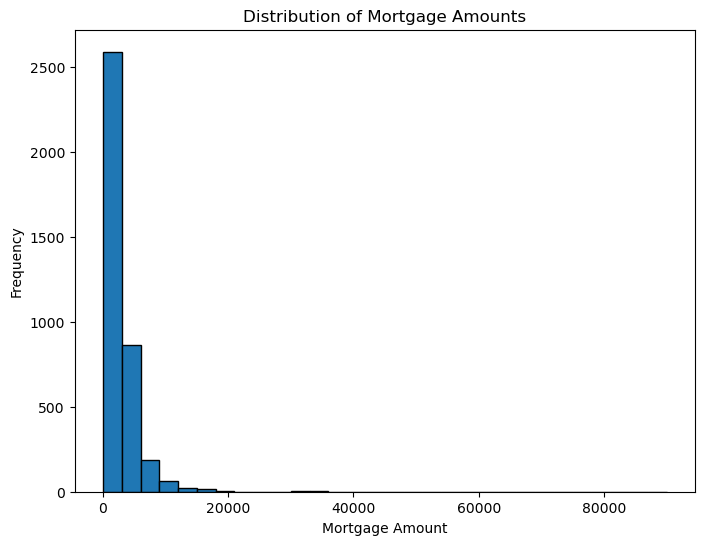

In [37]:
df_buy['MORTGAGE_AMOUNT'].plot(kind='hist', bins=30, edgecolor='black', figsize=(8, 6))
plt.title('Distribution of Mortgage Amounts')
plt.xlabel('Mortgage Amount')
plt.ylabel('Frequency')
plt.show()

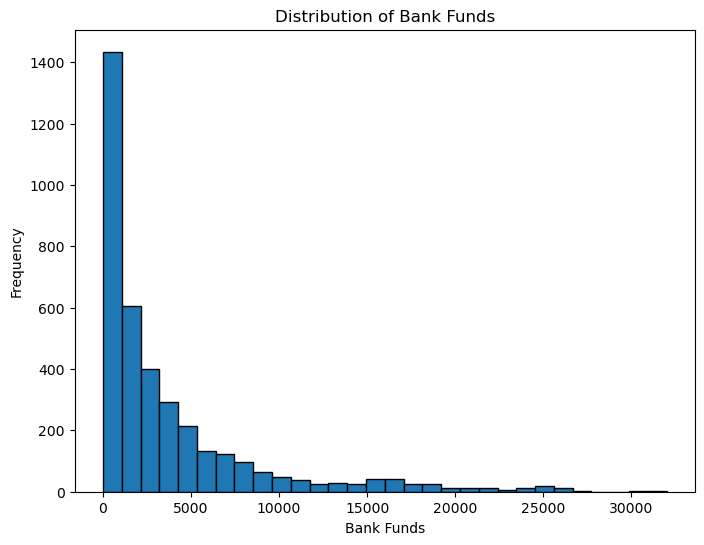

In [38]:
df_buy['BANK_FUNDS'].plot(kind='hist', bins=30, edgecolor='black', figsize=(8, 6))
plt.title('Distribution of Bank Funds')
plt.xlabel('Bank Funds')
plt.ylabel('Frequency')
plt.show()

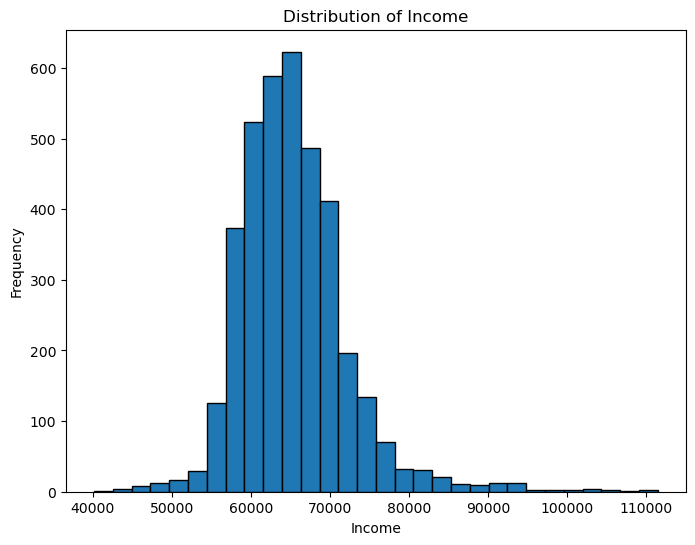

In [39]:
df_buy['INCOME'].plot(kind='hist', bins=30,edgecolor='black', figsize=(8, 6))
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

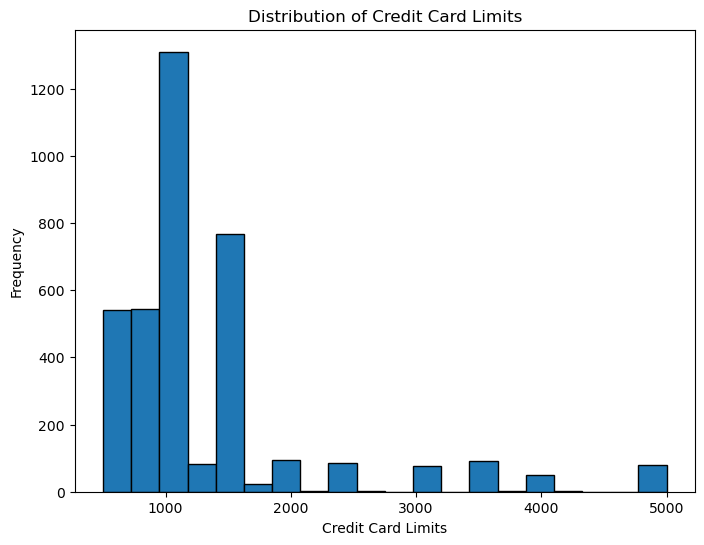

In [40]:
df_buy['CREDIT_CARD_LIMITS'].plot(kind='hist', bins=20, edgecolor='black', figsize=(8, 6))
plt.title('Distribution of Credit Card Limits')
plt.xlabel('Credit Card Limits')
plt.ylabel('Frequency')
plt.show()

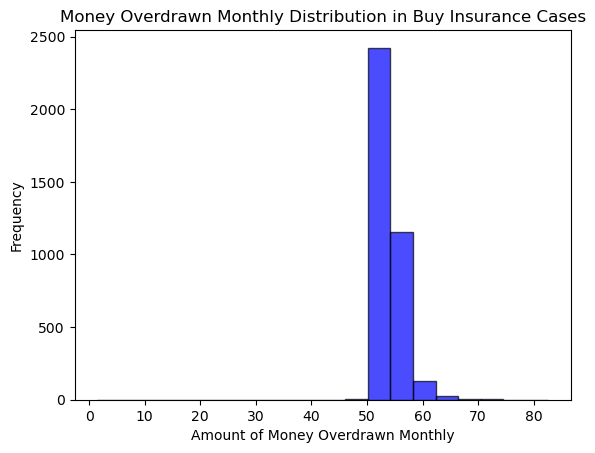

In [41]:
plt.hist(df_buy['MONEY_MONTLY_OVERDRAWN'], bins=20, color='blue', alpha=0.7, edgecolor='black')

plt.xlabel('Amount of Money Overdrawn Monthly')
plt.ylabel('Frequency')
plt.title('Money Overdrawn Monthly Distribution in Buy Insurance Cases')
plt.show()

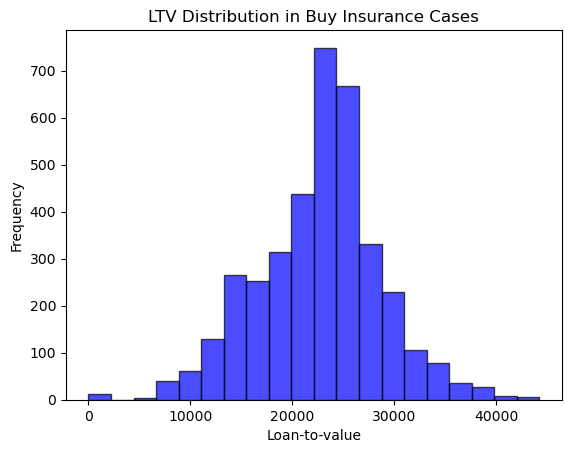

In [61]:
plt.hist(df_buy['LTV'], bins=20, color='blue', alpha=0.7, edgecolor='black')

plt.xlabel('Loan-to-value')
plt.ylabel('Frequency')
plt.title('LTV Distribution in Buy Insurance Cases')
plt.show()

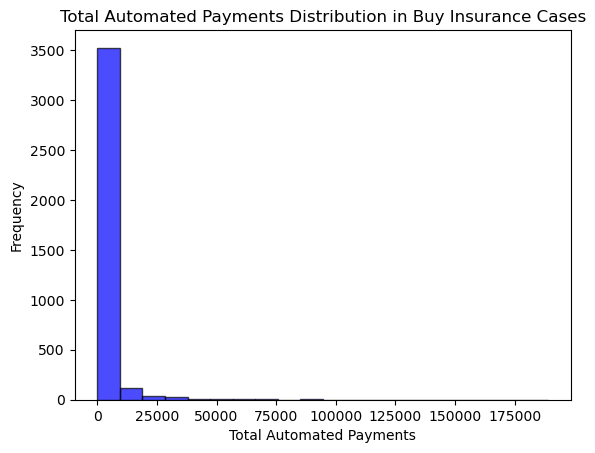

In [43]:
plt.hist(df_buy['TOTAL_AUTOM_PAYMENTS'], bins=20, color='blue', alpha=0.7, edgecolor='black')

plt.xlabel('Total Automated Payments')
plt.ylabel('Frequency')
plt.title('Total Automated Payments Distribution in Buy Insurance Cases')
plt.show()

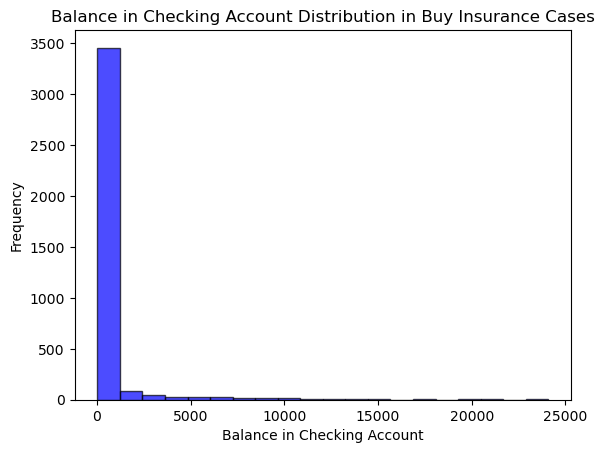

In [44]:
plt.hist(df_buy['CHECKING_BALANCE'], bins=20, color='blue', alpha=0.7, edgecolor='black')

plt.xlabel('Balance in Checking Account')
plt.ylabel('Frequency')
plt.title('Balance in Checking Account Distribution in Buy Insurance Cases')
plt.show()

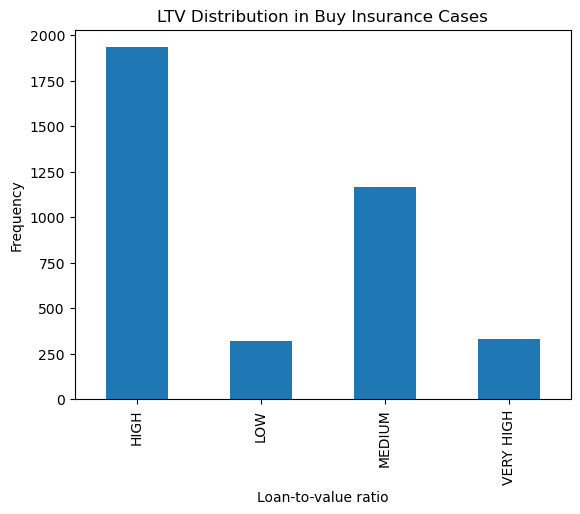

In [45]:
df_buy['LTV_BIN'].value_counts().sort_index().plot(kind='bar')

plt.xlabel('Loan-to-value ratio')
plt.ylabel('Frequency')
plt.title('LTV Distribution in Buy Insurance Cases')
plt.show()

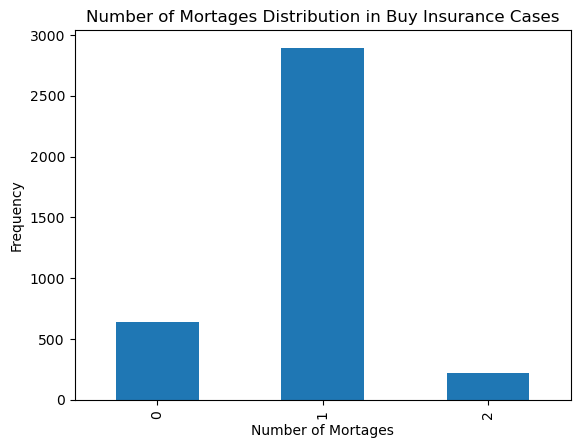

In [46]:
df_buy['NUM_MORTGAGES'].value_counts().sort_index().plot(kind='bar')

plt.xlabel('Number of Mortages')
plt.ylabel('Frequency')
plt.title('Number of Mortages Distribution in Buy Insurance Cases')
plt.show()

## Feature Engineering

### Converting categorical features to numeric

In [47]:
# Encoding Male as 0, Female as 1
df['GENDER'] = df['GENDER'].replace(to_replace = 'M', value=0)
df['GENDER'] = df['GENDER'].replace(to_replace = 'F', value=1)

#Using one hot encoding for profesion , state  and region
df['STATE'] = df['STATE'].astype('category').cat.codes
df['REGION'] = df['REGION'].astype('category').cat.codes
df['PROFESSION'] = df['PROFESSION'].astype('category').cat.codes
df.head()

# ENCODING LTV_BIN AS 0,1,2,3
df['LTV_BIN'] = df['LTV_BIN'].replace(to_replace='LOW', value=0)
df['LTV_BIN'] = df['LTV_BIN'].replace(to_replace='MEDIUM', value=1)
df['LTV_BIN'] = df['LTV_BIN'].replace(to_replace='HIGH', value=2)
df['LTV_BIN'] = df['LTV_BIN'].replace(to_replace='VERY HIGH', value=3)

# ENCODING  MARTIAL_STATUS AS 0,1  
df['MARITAL_STATUS']=df['MARITAL_STATUS'].replace(to_replace='SINGLE',value=0)
df['MARITAL_STATUS']=df['MARITAL_STATUS'].replace(to_replace='MARRIED',value=1)
df['MARITAL_STATUS']=df['MARITAL_STATUS'].replace(to_replace=['DIVORCED', 'WIDOWED', 'OTHER'],value=2)

# ENCODING BUY_INSURANCE AS 0,1
df['BUY_INSURANCE']= df['BUY_INSURANCE'].replace(to_replace='No',value=0)
df['BUY_INSURANCE']= df['BUY_INSURANCE'].replace(to_replace='Yes',value=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13880 entries, 0 to 13879
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MARITAL_STATUS          13880 non-null  int64  
 1   STATE                   13880 non-null  int8   
 2   CREDIT_BALANCE          13880 non-null  int64  
 3   CUSTOMER_TENURE         13880 non-null  int64  
 4   MORTGAGE_AMOUNT         13880 non-null  int64  
 5   BANK_FUNDS              13880 non-null  int64  
 6   NUM_DEPENDENTS          13880 non-null  int64  
 7   HAS_CHILDREN            13880 non-null  int64  
 8   INCOME                  13880 non-null  int64  
 9   GENDER                  13880 non-null  int64  
 10  PROFESSION              13880 non-null  int8   
 11  CREDIT_CARD_LIMITS      13880 non-null  int64  
 12  REGION                  13880 non-null  int8   
 13  HOME_OWNERSHIP          13880 non-null  int64  
 14  NUM_ONLINE_TRANS        13880 non-null

C:\Users\HP\AppData\Local\Temp\ipykernel_6852\2912830167.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GENDER'] = df['GENDER'].replace(to_replace = 'F', value=1)
C:\Users\HP\AppData\Local\Temp\ipykernel_6852\2912830167.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LTV_BIN'] = df['LTV_BIN'].replace(to_replace='VERY HIGH', value=3)
C:\Users\HP\AppData\Local\Temp\ipykernel_6852\2912830167.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the o

,MARITAL_STATUS,STATE,CREDIT_BALANCE,CUSTOMER_TENURE,MORTGAGE_AMOUNT,BANK_FUNDS,NUM_DEPENDENTS,HAS_CHILDREN,INCOME,GENDER,...,AGE,MONEY_MONTLY_OVERDRAWN,LTV,TOTAL_AUTOM_PAYMENTS,NUM_TRANS_TELLER,CHECKING_BALANCE,NUM_TRANS_ATM,LTV_BIN,NUM_MORTGAGES,CAR_OWNERSHIP
0,0,3,0,3,0,0,3,0,65871,0,...,24,53.06,14367.75,0,0,25,0,1,0,0
1,0,15,0,4,0,290,4,0,68747,0,...,35,53.84,14686.75,287,2,25,4,1,0,1
2,1,9,0,3,1000,550,3,0,68684,0,...,26,53.48,25271.00,132,2,25,4,2,1,1
3,1,21,0,5,1200,1000,5,0,59354,1,...,24,53.08,19738.50,628,3,619,1,1,1,1
4,1,21,0,4,1800,0,3,0,84801,1,...,47,53.06,31900.25,0,0,25,0,3,1,1


### Removing multicolinearity and outliers

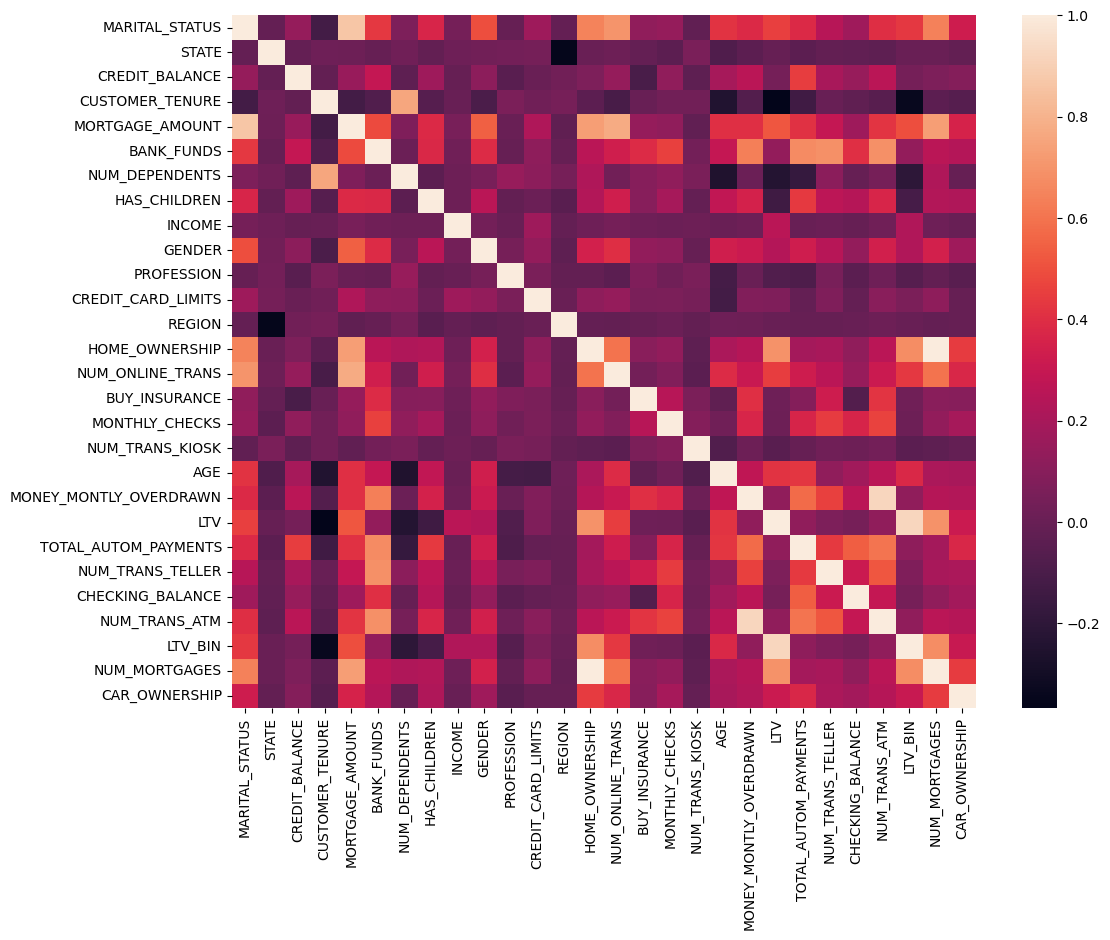

In [48]:
# correlation matrix
corrmat = df.corr(method="spearman")
f, ax = plt.subplots(figsize=(12, 9))
corrmat
sns.heatmap(corrmat, xticklabels=True, yticklabels=True);

In [49]:
corrmat

,MARITAL_STATUS,STATE,CREDIT_BALANCE,CUSTOMER_TENURE,MORTGAGE_AMOUNT,BANK_FUNDS,NUM_DEPENDENTS,HAS_CHILDREN,INCOME,GENDER,...,AGE,MONEY_MONTLY_OVERDRAWN,LTV,TOTAL_AUTOM_PAYMENTS,NUM_TRANS_TELLER,CHECKING_BALANCE,NUM_TRANS_ATM,LTV_BIN,NUM_MORTGAGES,CAR_OWNERSHIP
MARITAL_STATUS,1.000000,-0.013196,0.139983,-0.126683,0.861903,0.429792,0.065255,0.366303,0.038519,0.496933,...,0.412339,0.384371,0.454525,0.384342,0.248074,0.176864,0.397979,0.428333,0.641932,0.324660
STATE,-0.013196,1.000000,-0.010134,0.021390,0.015246,-0.006945,0.022867,-0.018892,0.019441,0.028445,...,-0.080197,-0.041128,-0.007132,-0.037017,-0.017560,-0.025029,-0.032208,0.001093,0.002553,-0.018716
CREDIT_BALANCE,0.139983,-0.010134,1.000000,-0.015158,0.154602,0.293328,-0.033900,0.171353,-0.005752,0.113524,...,0.196614,0.257541,0.040574,0.449139,0.200807,0.150401,0.262507,0.040586,0.067856,0.087449
CUSTOMER_TENURE,-0.126683,0.021390,-0.015158,1.000000,-0.124348,-0.075219,0.757758,-0.062303,-0.001493,-0.100464,...,-0.246000,-0.072054,-0.367762,-0.134534,-0.002816,-0.030430,-0.057823,-0.338082,-0.037460,-0.060479
MORTGAGE_AMOUNT,0.861903,0.015246,0.154602,-0.124348,1.000000,0.482510,0.075627,0.385181,0.049235,0.545771,...,0.401892,0.405716,0.518460,0.410991,0.291815,0.166530,0.421665,0.496326,0.730531,0.356117
BANK_FUNDS,0.429792,-0.006945,0.293328,-0.075219,0.482510,1.000000,0.010398,0.379003,0.026904,0.390358,...,0.291571,0.632715,0.139740,0.670059,0.687725,0.404467,0.684834,0.139322,0.260871,0.241055
NUM_DEPENDENTS,0.065255,0.022867,-0.033900,0.757758,0.075627,0.010398,1.000000,-0.039994,0.011799,0.049738,...,-0.253910,0.008111,-0.236900,-0.172197,0.111874,-0.008163,0.047857,-0.206729,0.223253,-0.006066
HAS_CHILDREN,0.366303,-0.018892,0.171353,-0.062303,0.385181,0.379003,-0.039994,1.000000,0.013802,0.260458,...,0.283046,0.351747,-0.141536,0.438911,0.265990,0.245289,0.366305,-0.113546,0.230778,0.223259
INCOME,0.038519,0.019441,-0.005752,-0.001493,0.049235,0.026904,0.011799,0.013802,1.000000,0.038161,...,0.003229,0.015364,0.259353,-0.000612,0.007076,-0.006173,0.024839,0.226740,0.020495,0.000881
GENDER,0.496933,0.028445,0.113524,-0.100464,0.545771,0.390358,0.049738,0.260458,0.038161,1.000000,...,0.335714,0.315314,0.237348,0.327358,0.248885,0.137431,0.338107,0.228635,0.344239,0.174633


In [50]:
#checking for high colinearity
filtered_corr = corrmat[corrmat > 0.7]
filtered_corr

,MARITAL_STATUS,STATE,CREDIT_BALANCE,CUSTOMER_TENURE,MORTGAGE_AMOUNT,BANK_FUNDS,NUM_DEPENDENTS,HAS_CHILDREN,INCOME,GENDER,...,AGE,MONEY_MONTLY_OVERDRAWN,LTV,TOTAL_AUTOM_PAYMENTS,NUM_TRANS_TELLER,CHECKING_BALANCE,NUM_TRANS_ATM,LTV_BIN,NUM_MORTGAGES,CAR_OWNERSHIP
MARITAL_STATUS,1.000000,NaN,NaN,NaN,0.861903,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STATE,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CREDIT_BALANCE,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUSTOMER_TENURE,NaN,NaN,NaN,1.000000,NaN,NaN,0.757758,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MORTGAGE_AMOUNT,0.861903,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730531,NaN
BANK_FUNDS,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NUM_DEPENDENTS,NaN,NaN,NaN,0.757758,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HAS_CHILDREN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INCOME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GENDER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Belows are the variables with high colinearity (>0.7)
* `MARITAL_STATUS` and `MORTGAGE_AMOUNT` (0.861903)
* `CUSTOMER_TENURE` and `NUM_DEPENDENTS` (0.757758)
* `MORTGAGE_AMOUNT` and  `HOME_OWNERSHIP` (0.730178)
* `MORTGAGE_AMOUNT` and `NUM_ONLINE_TRANS` (0.770440)
* `MORTGAGE_AMOUNT` and `NUM_MORTGAGES` (0.730531)
* `HOME_OWNERSHIP` and `NUM_MORTGAGES` (0.999370)
* `MONEY_MONTLY_OVERDRAWN` and `NUM_TRANS_ATM` (0.924718)
* `LTV` and `LTV_BIN` (0.923191)

In [51]:
# Dropping colinear variables
df = df.drop('MORTGAGE_AMOUNT', axis=1) #colinear with marital status, home ownership, num_online_trans, num_mortgages
df = df.drop('NUM_DEPENDENTS', axis=1) #colinear with customer tenure
df = df.drop('NUM_MORTGAGES', axis=1) #colinear with home ownership
df = df.drop('MONEY_MONTLY_OVERDRAWN', axis=1) #colinear with num_trans_ATM
df = df.drop('LTV_BIN', axis=1) #colinear with LTV

### Boxplot analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_6852\740744019.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


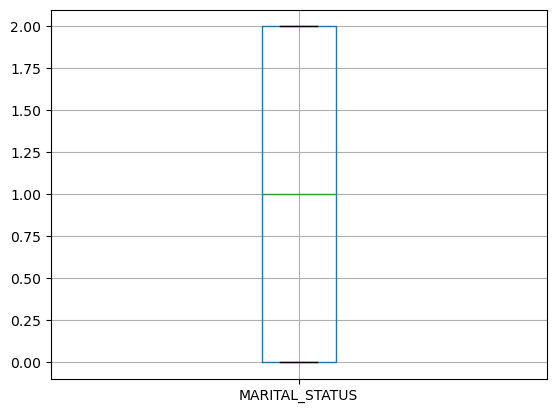

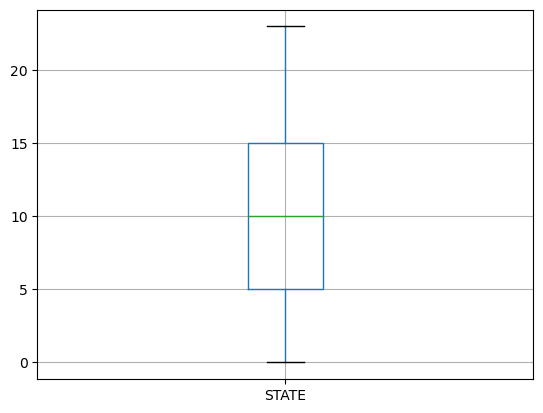

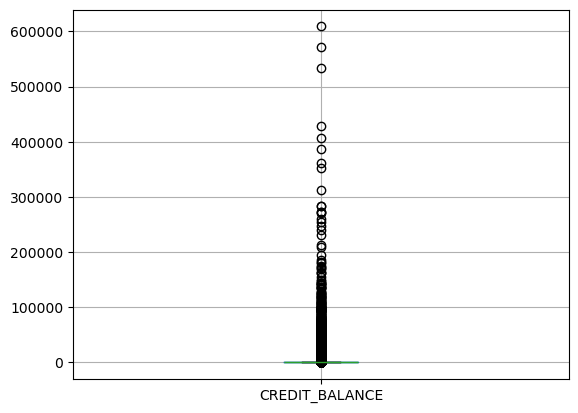

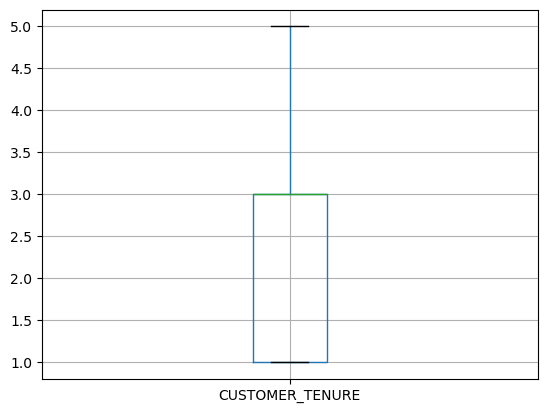

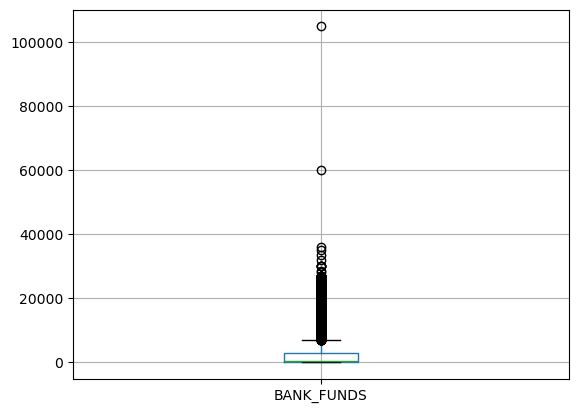

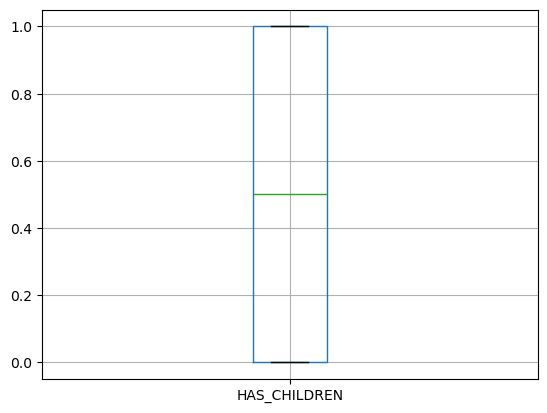

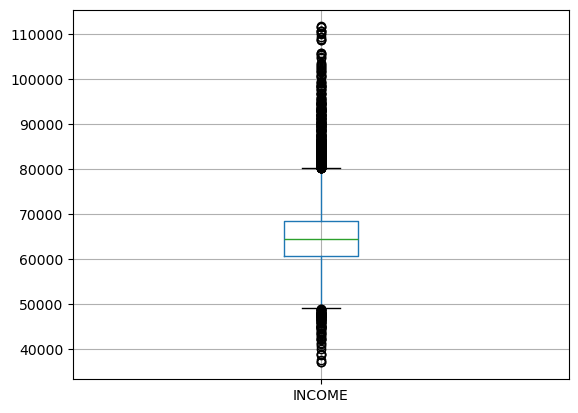

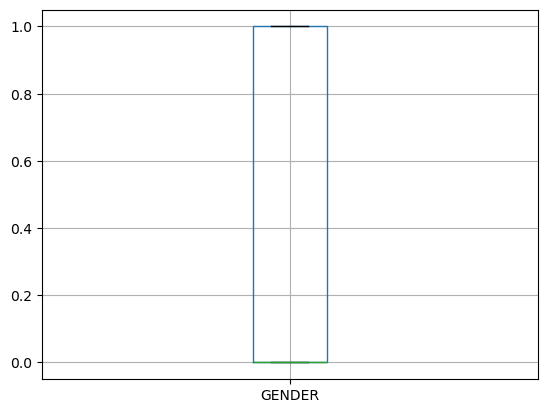

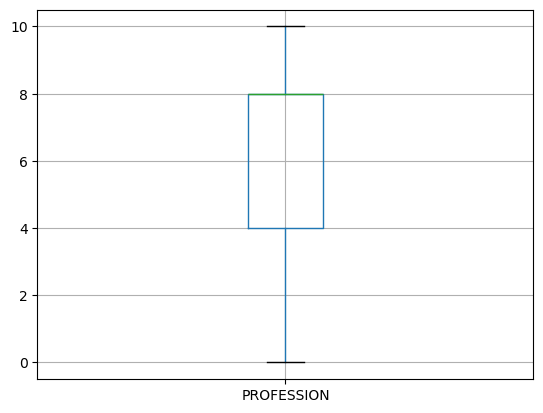

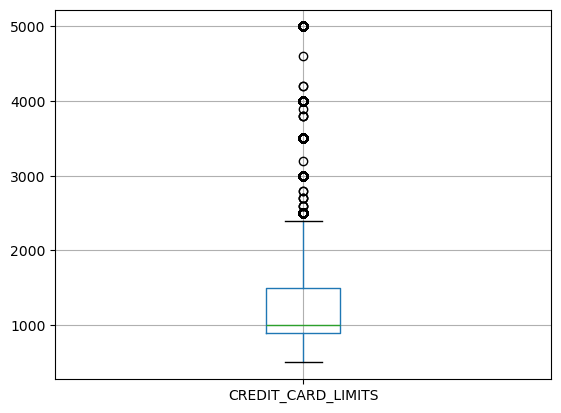

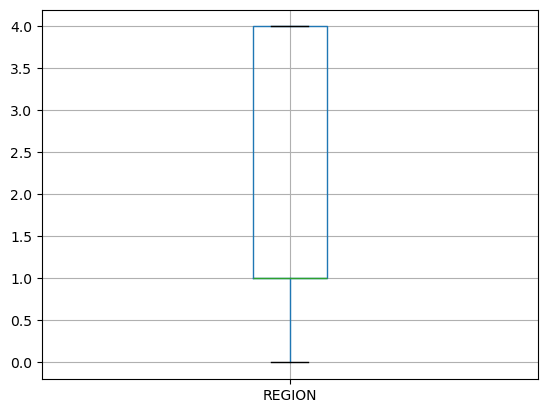

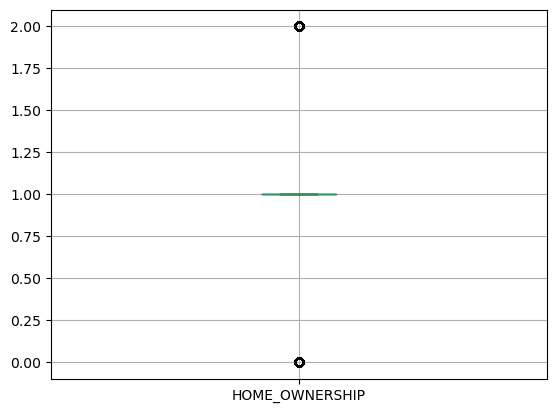

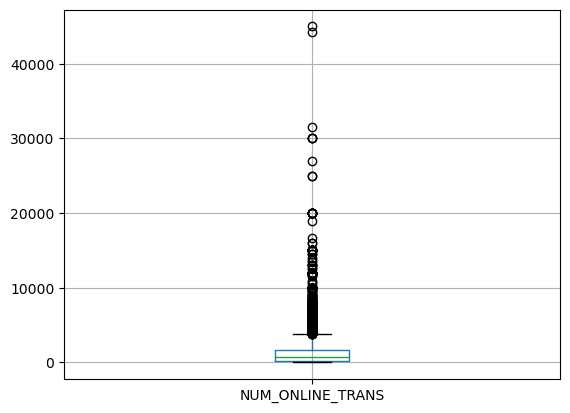

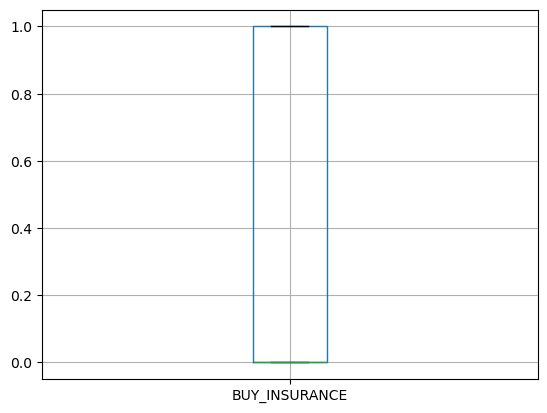

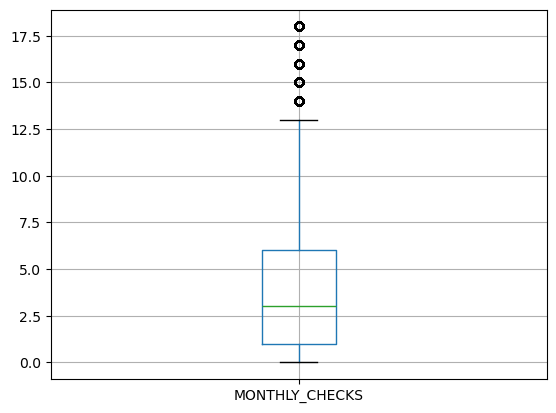

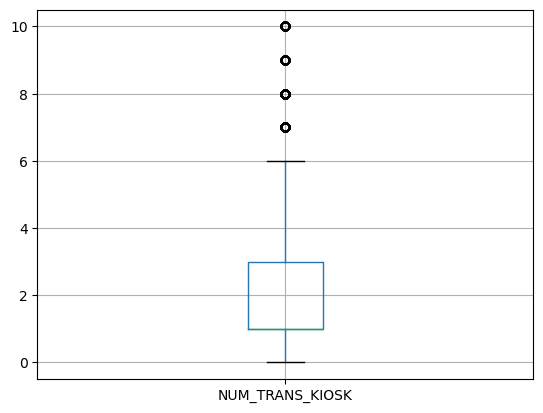

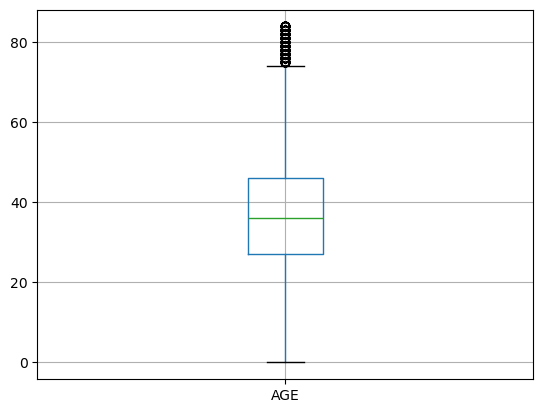

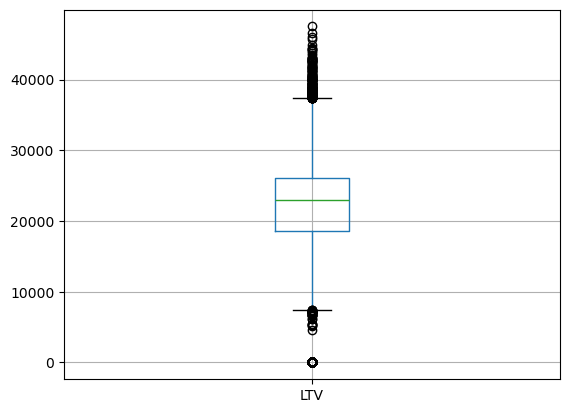

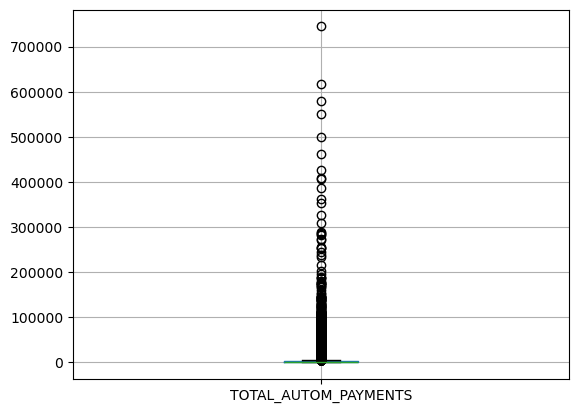

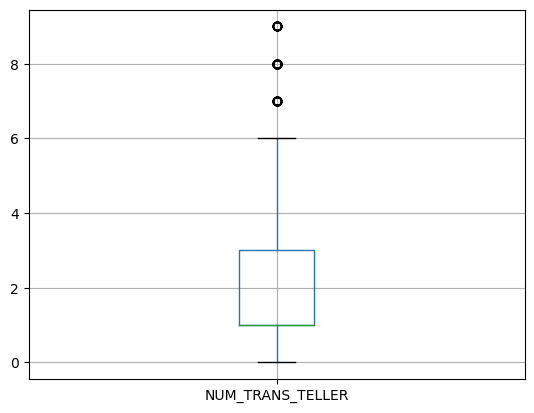

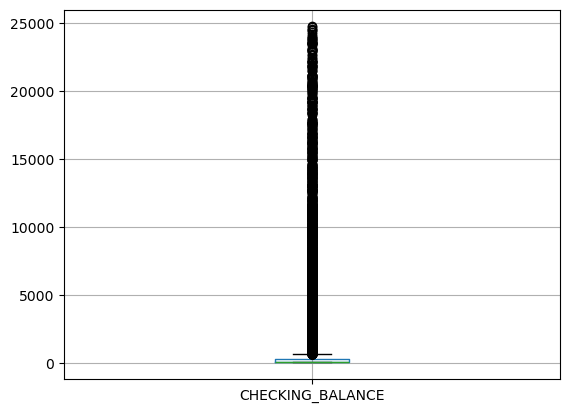

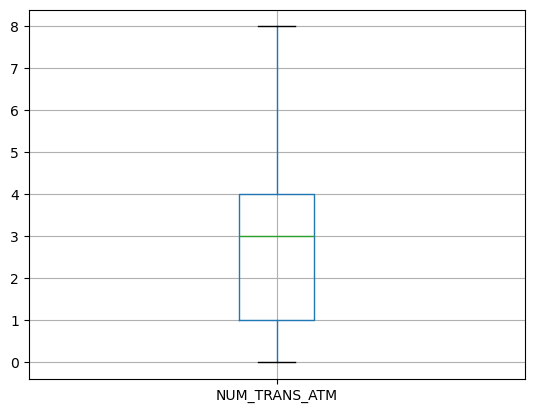

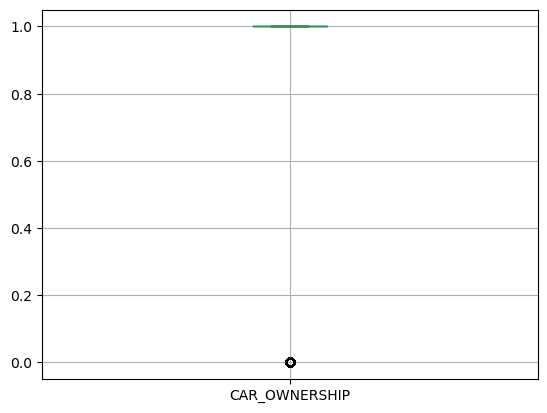

In [52]:
for column in df.columns:
    plt.figure()
    df.boxplot([column])

### Removing outliers

From the boxplot analysis, we found out some variables with outliers. We should try to reduce outliers so that the predictive model is not bias. 

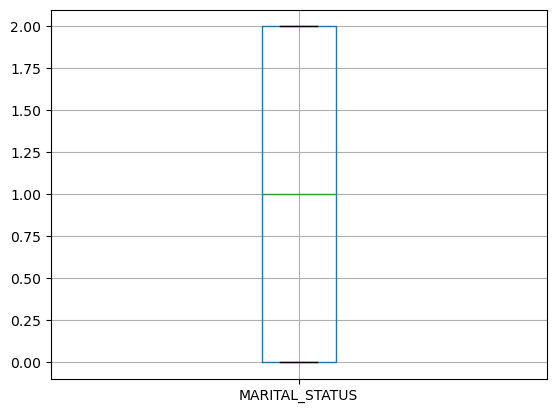

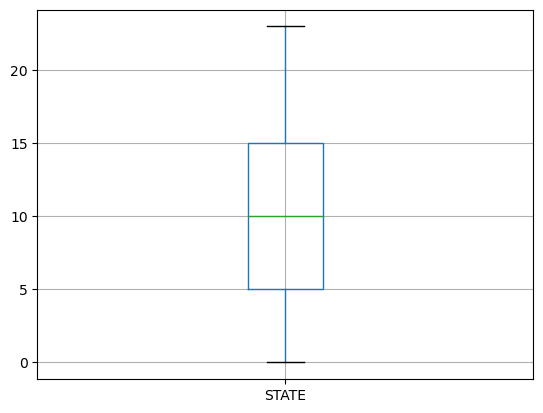

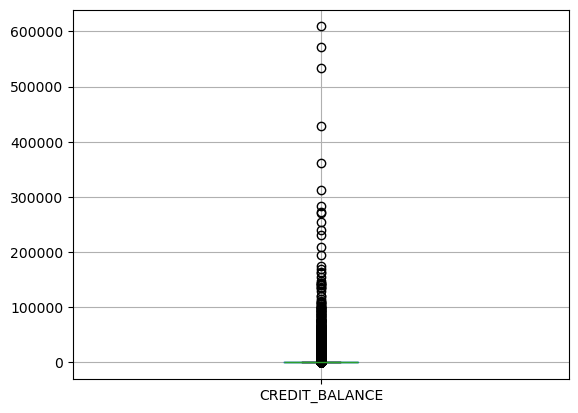

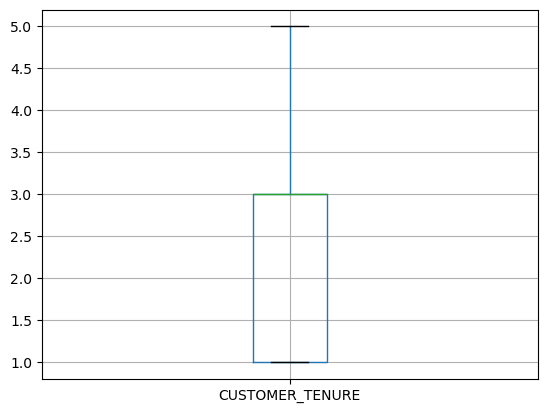

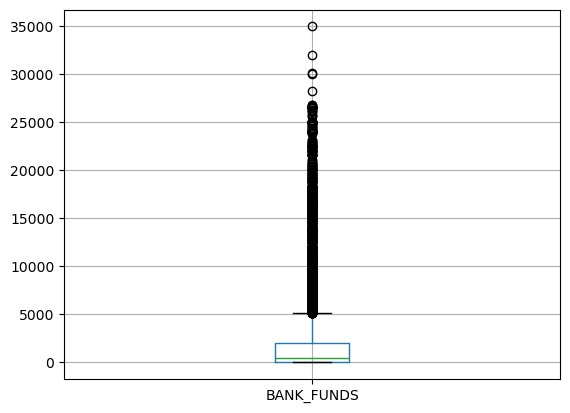

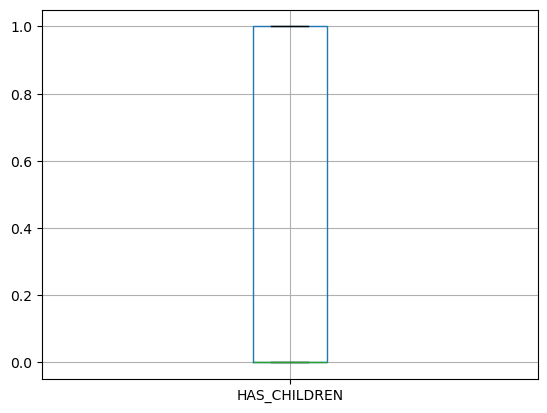

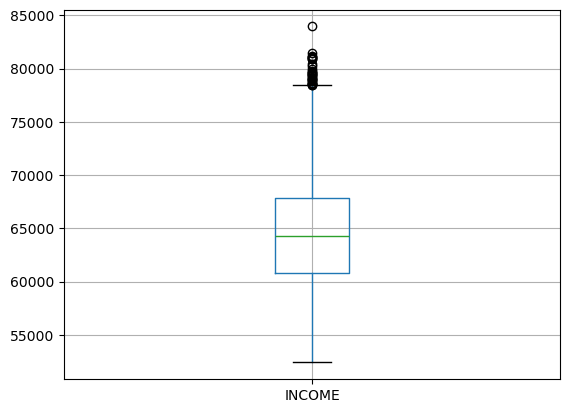

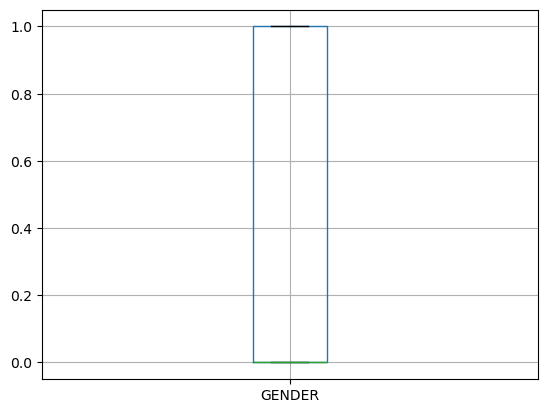

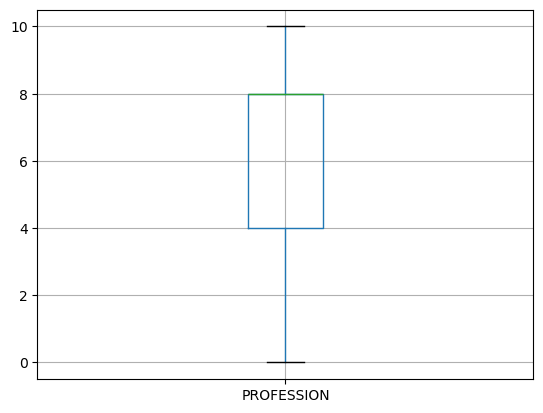

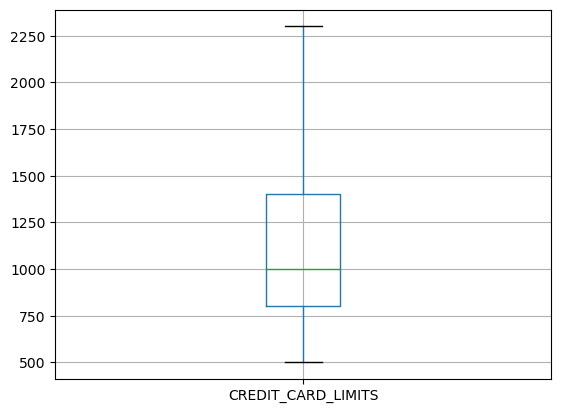

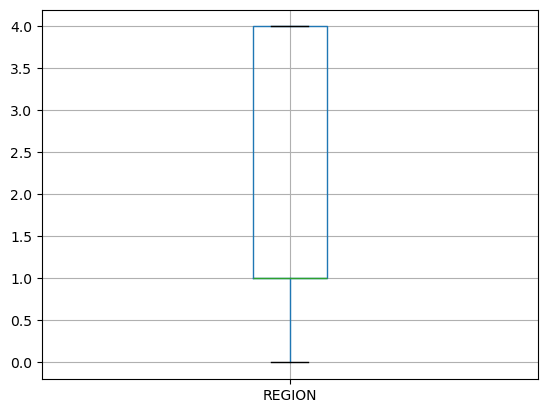

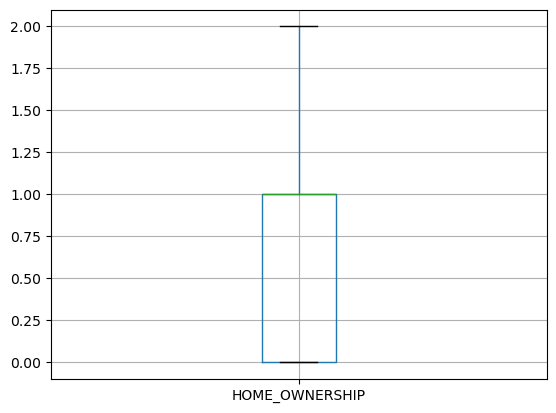

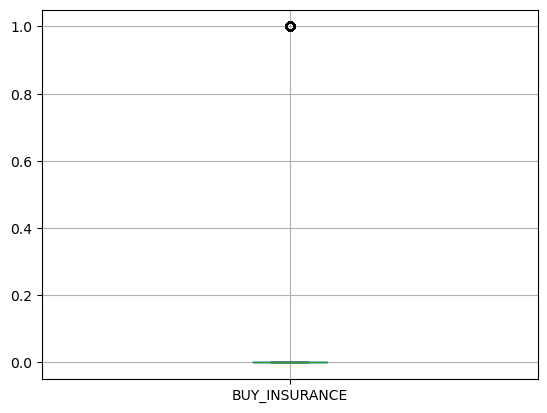

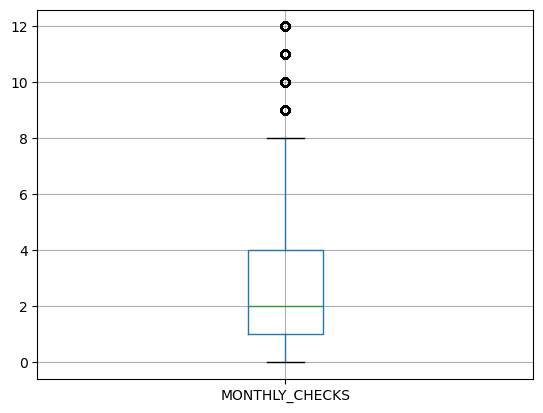

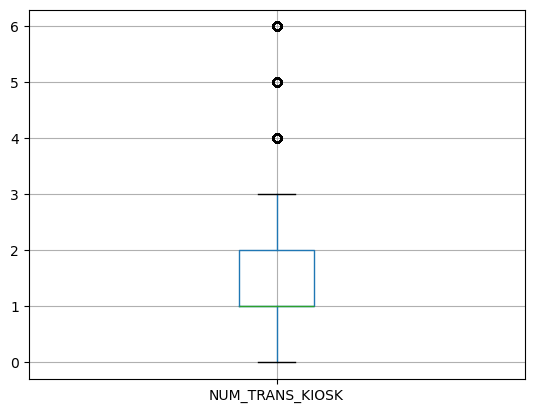

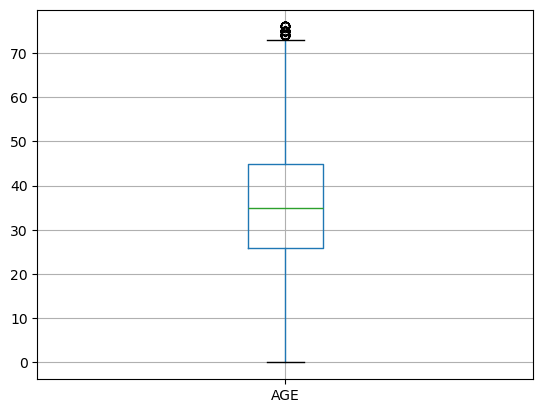

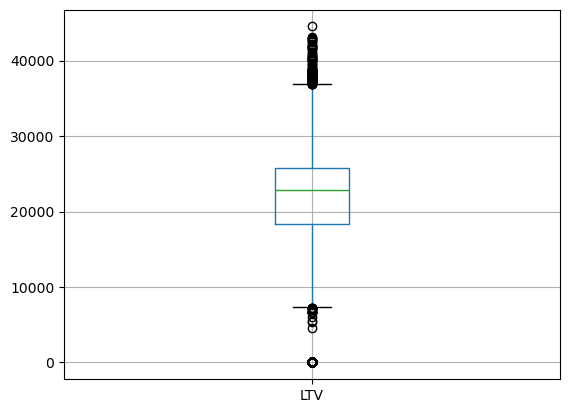

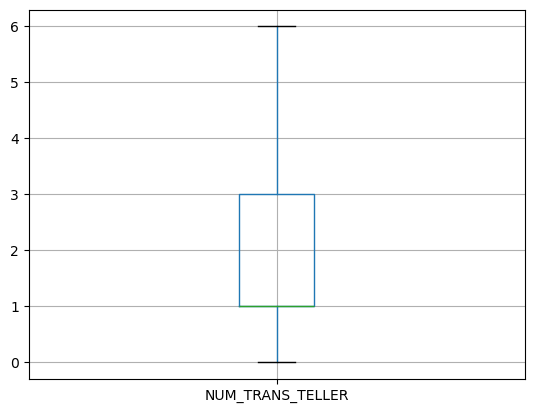

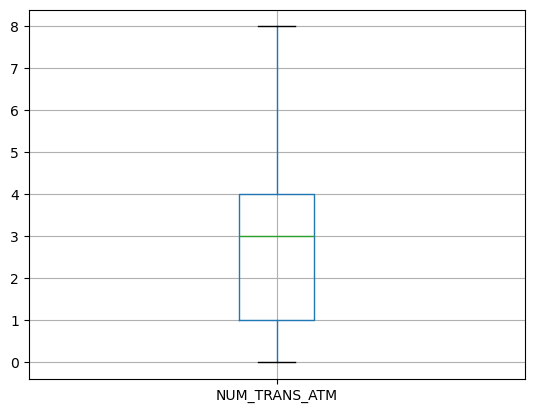

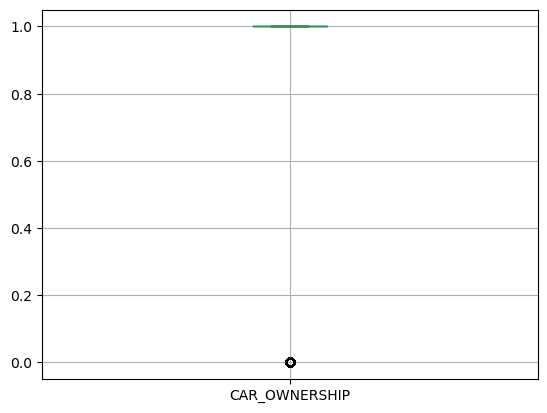

In [53]:
df = df[df.MONTHLY_CHECKS<13]
df = df[df.NUM_TRANS_KIOSK<7]
df = df[df.NUM_TRANS_TELLER<7]
df = df[df.CREDIT_CARD_LIMITS<2400]
df = df[df.AGE<77]
df = df.drop('CHECKING_BALANCE', axis=1)
df = df.drop('TOTAL_AUTOM_PAYMENTS', axis=1)
df = df.drop('NUM_ONLINE_TRANS', axis=1)
for column in df.columns:
    plt.figure()
    df.boxplot([column])

### Feature Scaling

In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df= pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [55]:
df

,MARITAL_STATUS,STATE,CREDIT_BALANCE,CUSTOMER_TENURE,BANK_FUNDS,HAS_CHILDREN,INCOME,GENDER,PROFESSION,CREDIT_CARD_LIMITS,REGION,HOME_OWNERSHIP,BUY_INSURANCE,MONTHLY_CHECKS,NUM_TRANS_KIOSK,AGE,LTV,NUM_TRANS_TELLER,NUM_TRANS_ATM,CAR_OWNERSHIP
0,0.0,0.130435,0.0,0.50,0.000000,0.0,0.426806,0.0,0.7,0.277778,1.00,0.0,0.0,0.000000,0.166667,0.315789,0.322693,0.000000,0.000,0.0
1,0.0,0.652174,0.0,0.75,0.008285,0.0,0.517934,0.0,0.8,0.111111,0.25,0.0,1.0,0.083333,0.166667,0.460526,0.329858,0.333333,0.500,1.0
2,0.0,0.913043,0.0,0.50,0.007143,0.0,0.295152,0.0,0.8,0.555556,0.75,0.0,0.0,0.250000,0.833333,0.342105,0.303855,0.333333,0.250,0.0
3,0.5,0.913043,0.0,0.50,0.000000,0.0,0.487326,0.0,0.8,0.555556,0.75,0.5,0.0,0.166667,0.833333,0.328947,0.560259,0.000000,0.250,1.0
4,1.0,0.130435,0.0,0.00,0.484272,1.0,0.385171,1.0,0.8,0.277778,1.00,0.5,1.0,0.333333,0.500000,0.631579,0.548894,0.833333,0.625,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10589,0.0,0.652174,0.0,0.25,0.000000,0.0,0.302567,0.0,0.7,0.388889,0.25,0.0,0.0,0.000000,0.166667,0.000000,0.000000,0.166667,0.000,1.0
10590,0.5,0.652174,0.0,1.00,0.022856,1.0,0.329594,1.0,0.8,0.000000,0.25,0.5,1.0,0.250000,0.166667,0.276316,0.343648,0.500000,0.500,1.0
10591,1.0,0.652174,0.0,0.00,0.428559,1.0,0.346641,1.0,0.8,0.277778,0.25,0.5,1.0,0.250000,0.166667,0.815789,0.573510,0.833333,0.625,1.0
10592,0.5,0.652174,0.0,0.75,0.152139,1.0,0.346008,0.0,0.8,0.277778,0.25,0.5,1.0,0.083333,0.500000,0.605263,0.481314,0.166667,0.750,1.0


## Creating test and train data

In [56]:
y = df['BUY_INSURANCE']
x = df.drop('BUY_INSURANCE', axis=1)

print('Target dimentions: ',y.shape)
print('Independent data dimentions: ',x.shape)

import sklearn.model_selection as model_selection
# split into train 0.6, test 0.2, validation 0.2
# Initial split to separate train+validation and test sets
x_train_val, x_test, y_train_val, y_test = model_selection.train_test_split(
    x, y, train_size=0.8, test_size=0.2, random_state=101
)

# Further split train+validation into train and validation sets
x_train, x_val, y_train, y_val = model_selection.train_test_split(
    x_train_val, y_train_val, train_size=0.75, test_size=0.25, random_state=101  # 0.75 x 0.8 = 0.6, 0.25 x 0.8 = 0.2
)

# Print dimensions
print('x_train dimensions: ', x_train.shape)
print('y_train dimensions: ', y_train.shape)
print('x_val dimensions: ', x_val.shape)
print('y_val dimensions: ', y_val.shape)
print('x_test dimensions: ', x_test.shape)
print('y_test dimensions: ', y_test.shape)

Target dimentions:  (10594,)
Independent data dimentions:  (10594, 19)
x_train dimensions:  (6356, 19)
y_train dimensions:  (6356,)
x_val dimensions:  (2119, 19)
y_val dimensions:  (2119,)
x_test dimensions:  (2119, 19)
y_test dimensions:  (2119,)


## Machine Learning

### Creating the model

In [57]:
from sklearn.metrics import accuracy_score, log_loss, f1_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

classifiers = [
    LogisticRegression(),
    Perceptron(max_iter=1000, tol=1e-3),
    MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
    
]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [58]:
accuracy = []
f1_sc = []
recall = []
precision = []
loss = []

for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(x_test)
    
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    accuracy.append(acc)
    
    f1 = f1_score(y_test, train_predictions, average='weighted')
    print('F1 score:{:.4%}'.format(f1))
    f1_sc.append(f1)
    
    recall_sc = recall_score(y_test, train_predictions, average='weighted')
    print('Recall:{:.4%}'.format(recall_sc))
    recall.append(recall_sc)
    
    pr_score = precision_score(y_test, train_predictions, average='weighted')
    print('Precision:{:.4%}'.format(pr_score))
    precision.append(pr_score)
    
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    loss.append(ll)

    print('Confusion matrix')
    print('-'*30)
    print(confusion_matrix(y_test, train_predictions))
    print('Classification report')
    print('-'*30)
    print(classification_report(y_test, train_predictions))
    
print("="*30)

LogisticRegression
****Results****
Accuracy: 77.7725%
F1 score:75.9041%
Recall:77.7725%
Precision:75.6514%
Log Loss: 8.01159072499961
Confusion matrix
------------------------------
[[1455  139]
 [ 332  193]]
Classification report
------------------------------
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86      1594
         1.0       0.58      0.37      0.45       525

    accuracy                           0.78      2119
   macro avg       0.70      0.64      0.66      2119
weighted avg       0.76      0.78      0.76      2119

Perceptron
****Results****
Accuracy: 66.5408%
F1 score:68.8247%
Recall:66.5408%
Precision:78.4138%
Log Loss: 12.059910454404937
Confusion matrix
------------------------------
[[986 608]
 [101 424]]
Classification report
------------------------------
              precision    recall  f1-score   support

         0.0       0.91      0.62      0.74      1594
         1.0       0.41      0.81      0.54       

### Plot the Training Results

Since MLP has the highest accuracy and the highest f1 score, we can conclude that it is the best model. However, we should make sure that is it not underfitted or overfitted. Therefore, we will look at the training vs validation loss plot and training vs validation accuracy plot, to determine if the model is generalised or overfitted.

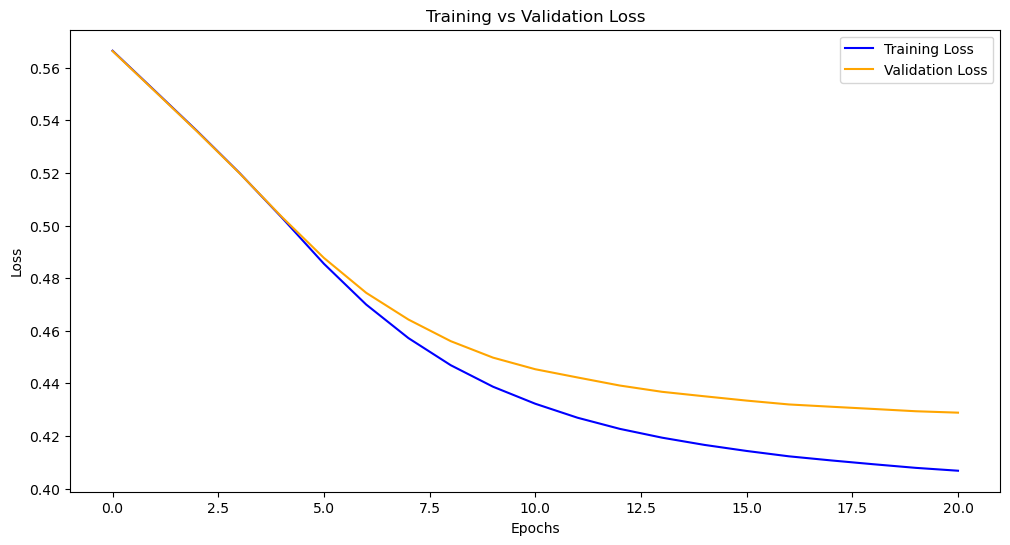

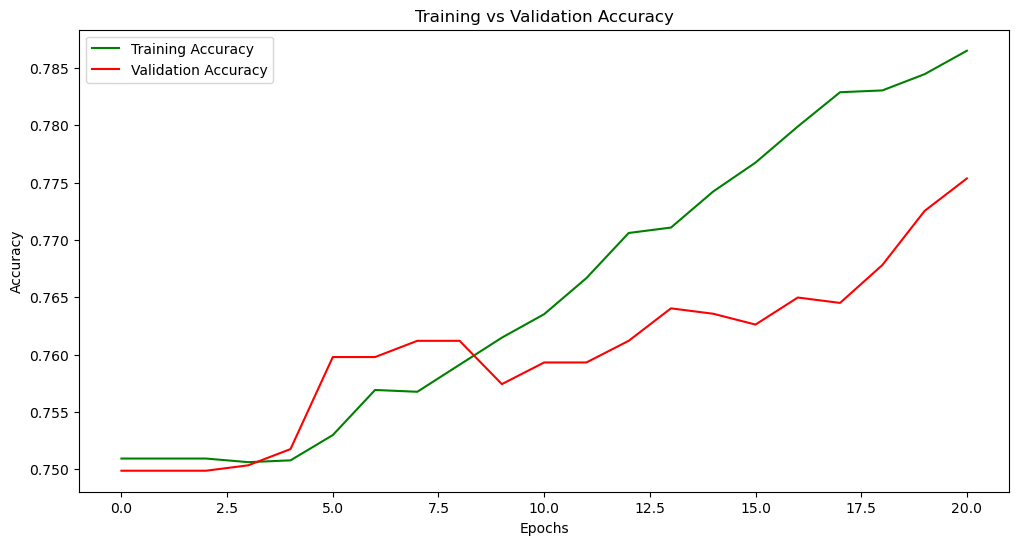

In [59]:
# Special Handling for MLPClassifier to log losses and accuracies
if any(isinstance(clf, MLPClassifier) for clf in classifiers):
    mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, random_state=101)
    
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    for epoch in range(21):  # Set number of epochs
        mlp.partial_fit(x_train, y_train, classes=np.unique(y_train))
        
        # Calculate training loss and accuracy
        train_loss = log_loss(y_train, mlp.predict_proba(x_train))
        train_acc = accuracy_score(y_train, mlp.predict(x_train))
        
        # Calculate validation loss and accuracy
        val_loss = log_loss(y_val, mlp.predict_proba(x_val))
        val_acc = accuracy_score(y_val, mlp.predict(x_val))
        
        # Store metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
    
    # Plot losses
    plt.figure(figsize=(12, 6))
    plt.plot(train_losses, label="Training Loss", color="blue")
    plt.plot(val_losses, label="Validation Loss", color="orange")
    plt.title("Training vs Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
    # Plot accuracies
    plt.figure(figsize=(12, 6))
    plt.plot(train_accuracies, label="Training Accuracy", color="green")
    plt.plot(val_accuracies, label="Validation Accuracy", color="red")
    plt.title("Training vs Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()


After comparing the training set and validation set of MLP with 20 epochs, the difference in accuracy and log loss is not a lot, implying that the model is generalised and is not overfitted.